# OCR Projet 6 - Anticipez les besoins en consommation de bâtiments 

# Partie 1 : Analyse Exploratoire et nettoyage des données

## 1. Import des modules

In [724]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px
import missingno as msno
from sklearn.preprocessing import StandardScaler, FunctionTransformer
from scipy import stats


print(f"Pandas      : {pd.__version__}")
print(f"Numpy       : {np.__version__}")
print(f"Seaborn     : {sns.__version__}")
print(f"Plotly      : {plotly.__version__}")
print(f"Missingno   : {msno.__version__}")
print(f"StandardScaler : {StandardScaler}")

Pandas      : 2.3.3
Numpy       : 2.3.4
Seaborn     : 0.13.2
Plotly      : 6.4.0
Missingno   : 0.5.2
StandardScaler : <class 'sklearn.preprocessing._data.StandardScaler'>


Ajout des options - pour voir l'ensemble des colonnes

In [725]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## 2. Analyse Exploratoire

### 2.1 Contenue de la base de données

In [726]:
df_building_raw = pd.read_csv('data/2016_Building_Energy_Benchmarking.csv')

In [727]:
# On regarde comment un batiment est défini dans ce jeu de données 
df_building_raw.head()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,7,DOWNTOWN,47.61220,-122.33799,1927,1.0,12,88434,0,88434,Hotel,Hotel,88434.0,NaN,NaN,NaN,NaN,NaN,60.0,81.699997,84.300003,182.500000,189.000000,7226362.5,7456910.0,2003882.00,1.156514e+06,3946027.0,12764.52930,1276453.0,False,NaN,Compliant,NaN,249.98,2.83
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,7,DOWNTOWN,47.61317,-122.33393,1996,1.0,11,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,NaN,61.0,94.800003,97.900002,176.100006,179.399994,8387933.0,8664479.0,0.00,9.504252e+05,3242851.0,51450.81641,5145082.0,False,NaN,Compliant,NaN,295.86,2.86
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,7,DOWNTOWN,47.61393,-122.33810,1969,1.0,41,956110,196718,759392,Hotel,Hotel,756493.0,NaN,NaN,NaN,NaN,NaN,43.0,96.000000,97.699997,241.899994,244.100006,72587024.0,73937112.0,21566554.00,1.451544e+07,49526664.0,14938.00000,1493800.0,False,NaN,Compliant,NaN,2089.28,2.19
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,7,DOWNTOWN,47.61412,-122.33664,1926,1.0,10,61320,0,61320,Hotel,Hotel,61320.0,NaN,NaN,NaN,NaN,NaN,56.0,110.800003,113.300003,216.199997,224.000000,6794584.0,6946800.5,2214446.25,8.115253e+05,2768924.0,18112.13086,1811213.0,False,NaN,Compliant,NaN,286.43,4.67
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,7,DOWNTOWN,47.61375,-122.34047,1980,1.0,18,175580,62000,113580,"Hotel, Parking, Swimming Pool",Hotel,123445.0,Parking,68009.0,Swimming Pool,0.0,NaN,75.0,114.800003,118.699997,211.399994,215.600006,14172606.0,14656503.0,0.00,1.573449e+06,5368607.0,88039.98438,8803998.0,False,NaN,Compliant,NaN,505.01,2.88


La visualisation des 5 premières lignes du DataFrame nous permets d'en identifier la structure : les différents bâtiments en ligne et leurs caractéristiques en colonne.  
 Ces caractéristiques se répartissent en plusieurs attributs des bâtiments :  
- Les types de bâtiments  
- La localisation (adresse, logitude - latitude)  
- Années de constructions  
- Nombre de bâtiments et d'étages   
- Surface (PropertyGFATotal (surface parking+ batiments), PropertyGFABuilding(s) (Surface des bâtiments))  
- Type d'usage et consommation par type d'usage  
- Performances énergériques : ENERGYSTARScore, Énergie consommée / surface...  
- Consommation énergétiques, en différentes unités : kBtu, kWh, kBtu, therms, kBtu  
- Émissions de GES : TotalGHGEmissions, GHGEmissionsIntensity  
Variables 'autres' : Comments, DefaultData, ComplianceStatus, Outlier..

In [728]:
df_building_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3376 entries, 0 to 3375
Data columns (total 46 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    3376 non-null   int64  
 1   DataYear                         3376 non-null   int64  
 2   BuildingType                     3376 non-null   object 
 3   PrimaryPropertyType              3376 non-null   object 
 4   PropertyName                     3376 non-null   object 
 5   Address                          3376 non-null   object 
 6   City                             3376 non-null   object 
 7   State                            3376 non-null   object 
 8   ZipCode                          3360 non-null   float64
 9   TaxParcelIdentificationNumber    3376 non-null   object 
 10  CouncilDistrictCode              3376 non-null   int64  
 11  Neighborhood                     3376 non-null   object 
 12  Latitude            

Le jeu de donnée comprend 3376 lignes, et donc bâtiments (ou ensemble de bâtiments), et 46 colonnes, les 46 variables (caractéristiques / features). On a plusieurs types de données : int, float, object et une valeur boolean.

### 2.2 Taille - doublons - valeurs manquantes

In [729]:
def analyse_df(df):
    print("- Taille du DataFrame :")
    taille = df.shape
    print(f"La taille du jeu de données est de {taille[0]} lignes et {taille[1]} colonnes. \n")

   
    print("- Nombre de doublons : ")
    doublons = df.duplicated().sum()
    print(f"Il y a {doublons} doublons dans le jeu de données. \n")
    

    # Affichage du graphique des valeurs manquantes
    msno.bar(df,
                sort='ascending'
            )
    

    print("- Colonnes avec valeurs manquantes : ")
    colonnes_null = df.isnull().sum()
    nb_colonnes_null = (colonnes_null > 0).sum()
    print(f"{nb_colonnes_null} colonnes contiennent des valeurs manquantes.")

- Taille du DataFrame :
La taille du jeu de données est de 3376 lignes et 46 colonnes. 

- Nombre de doublons : 
Il y a 0 doublons dans le jeu de données. 



- Colonnes avec valeurs manquantes : 
26 colonnes contiennent des valeurs manquantes.


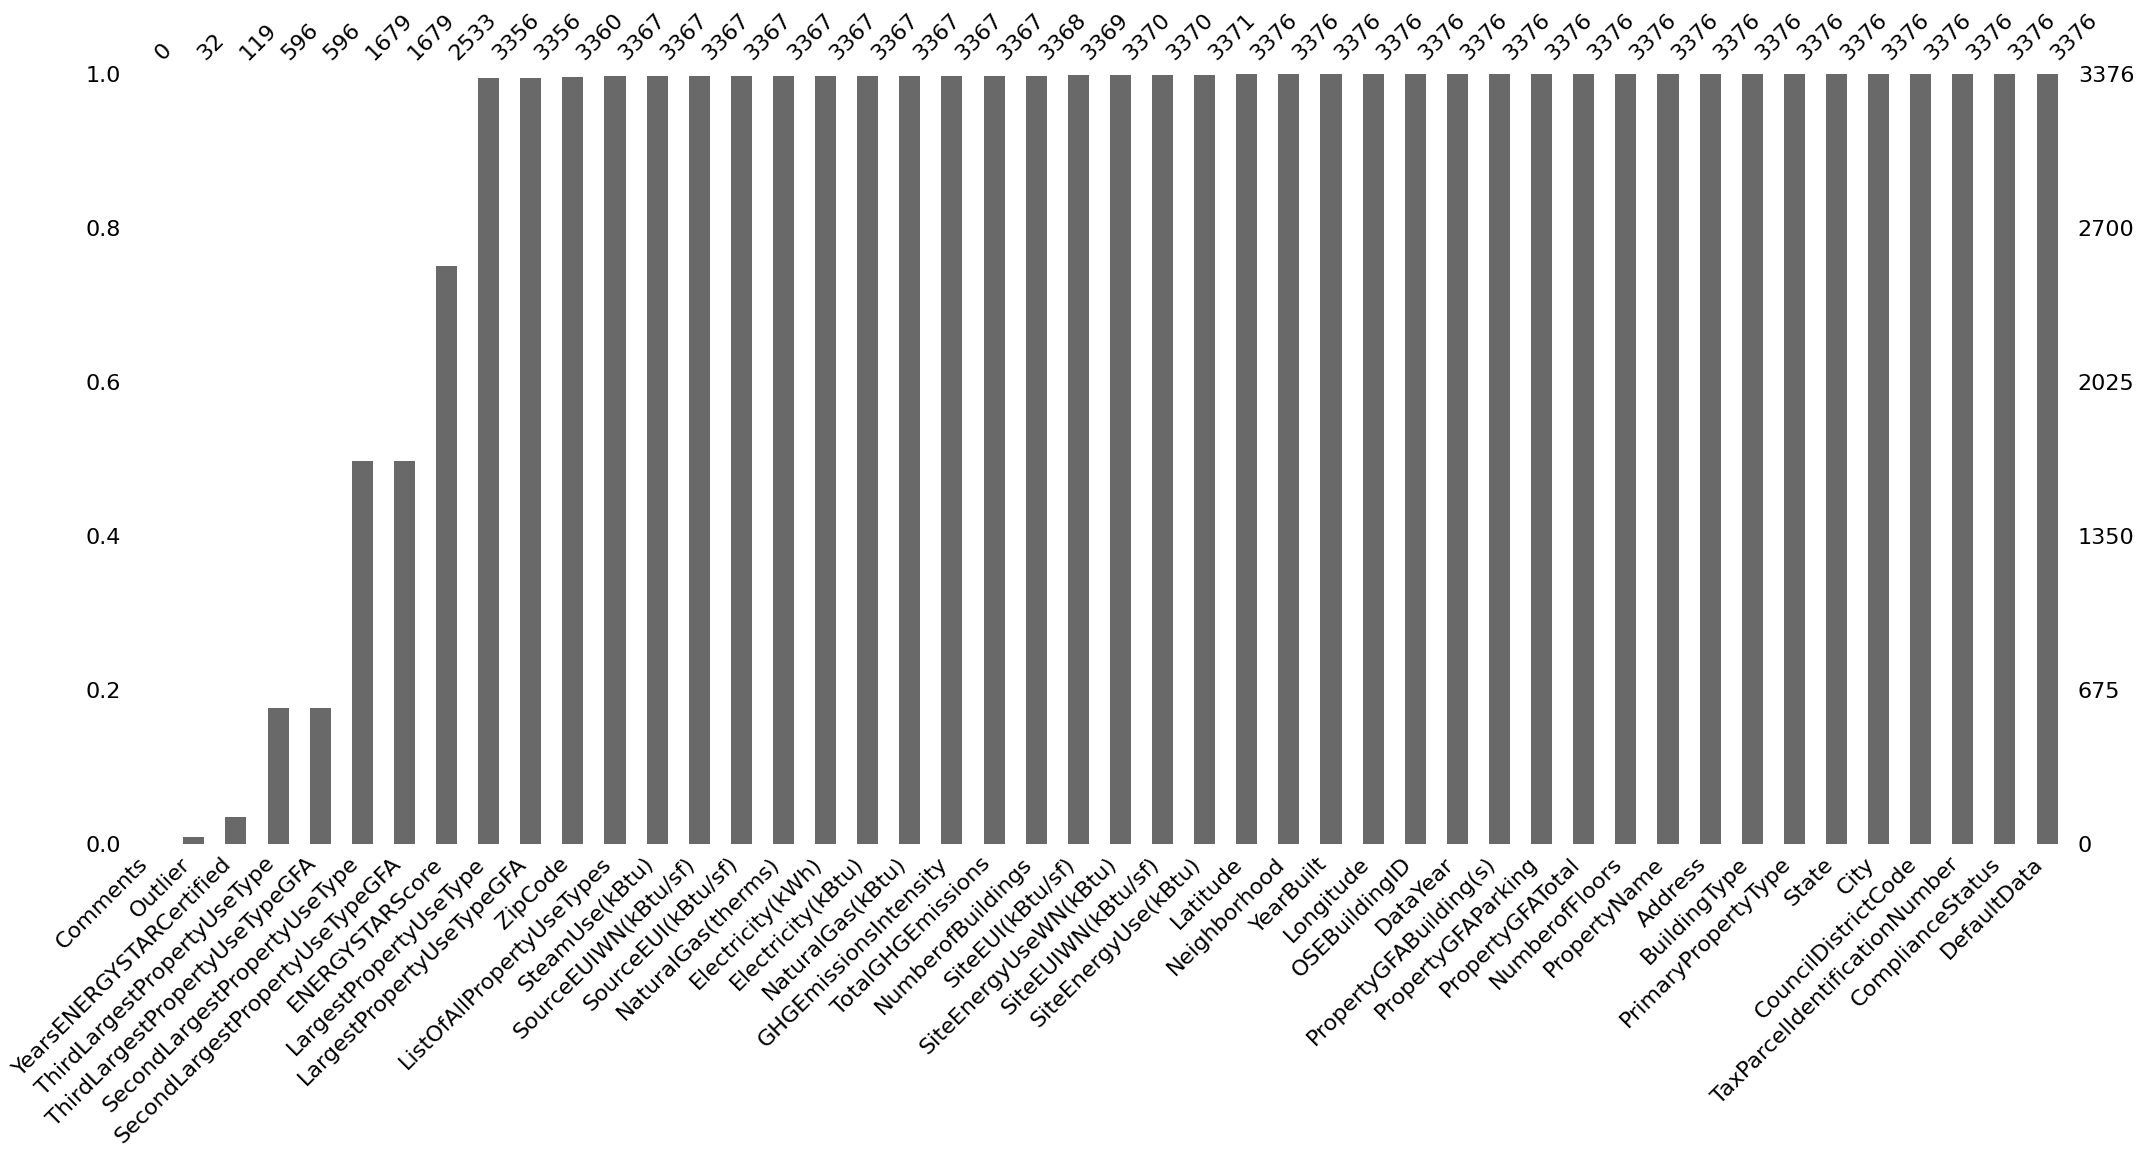

In [730]:
analyse_df(df_building_raw)

Il y a peu de valeurs manquantes sauf  : 
 - la colonne 'Comments' qui  est totalement vide.
 - La colonne 'Outlier' qui est presque vide (99% null - 32 non-null)  
 - Les colonnes sur les différents usages des batiments. Ceux sur les seconds et troisièmes usages peuvent s'expliquer par le fait que certain bâtiments ne doivent pas avoir plus d'un usage?
 - Les colonnes concernant la certification ENERGY STAR : YearsENERGYSTARCertified, ENERGYSTARScore  
 - Les informations sur les emissions (TotalGHGEmissions ) qui ont 9 valeurs nulles (sur 3376 bâtiments).

je decide de supprimer la colonne 'Comments', qui est vide.

In [731]:
df_building_clean = df_building_raw.drop(['Comments'], axis=1)

Je concerve pour l'heure les autres colonnes qui pourront peut être m'etre utile pour la suite de l'analyse.

## 3. Sélection des variables pertinentes

Je commence à explorer les variables du jeu de données afin d’identifier celles qui sont pertinentes pour répondre à ma problématique. L’objectif est de distinguer les variables utiles pour l’analyse ou la modélisation, des variables moins informatives ou redondantes.

### 3.1 Fonction visualisation des variables

In [732]:
def visualisation(df, group_col=None):
    """
    - Numérique : boxplot 
    - Catégorielle : barplot du nombre de lignes par valeur
    """
    for col in df.columns:
        if df[col].dtype in ['int64', 'float64']:
            plt.figure(figsize=(12,5))
            
            if group_col:
                # Boxplot par groupe avec couleurs
                sns.boxplot(
                    x=col,
                    y=group_col,
                    data=df,
                    palette=plt.cm.viridis(np.linspace(0, 1, df[group_col].nunique()))
                )
                plt.title(f'Distribution de {col} par {group_col}', fontsize=16)
                plt.xlabel(col, fontsize=14)
                plt.ylabel(group_col, fontsize=14)
            else:
                # Boxplot + histogramme côte à côte (en supprimant les NaN pour le tracé)
                plt.subplot(1, 2, 1)
                sns.boxplot(y=df[col].dropna(), color='skyblue')
                plt.title(f'Boxplot de {col}', fontsize=14)

                plt.subplot(1, 2, 2)
                sns.histplot(df[col].dropna(), kde=True, color='orange', bins=20)
                plt.title(f'Distribution de {col}', fontsize=14)
            
            plt.tight_layout()
            plt.show()
        
        else:
            # Catégorielle → barplot des comptes
            counts = df[col].value_counts().sort_values(ascending=True)
            plt.figure(figsize=(10,6))
            
            bars = plt.barh(
                counts.index,
                counts.values,
                color=plt.cm.viridis(np.linspace(0, 1, len(counts)))
            )
            
            # Afficher les valeurs à côté des barres
            for bar in bars:
                width = bar.get_width()
                plt.text(
                    width + 0.3,
                    bar.get_y() + bar.get_height()/2,
                    int(width),
                    ha='left',
                    va='center',
                    fontsize=12
                )
            
            plt.title(f'Nombre de lignes par {col}', fontsize=16)
            plt.xlabel('Nombre de lignes', fontsize=14)


### 3.1 Filtrage des bâtiments non résidentiels

L'énoncé évoque: vous voulez tenter de prédire les émissions de CO2 et la consommation totale d’énergie de **bâtiments non destinés à l’habitation** pour lesquels elles n’ont pas encore été mesurées. 
Il convient de sélectionner dans un premier temps les seules bâtiments non destinés à l'habitation.

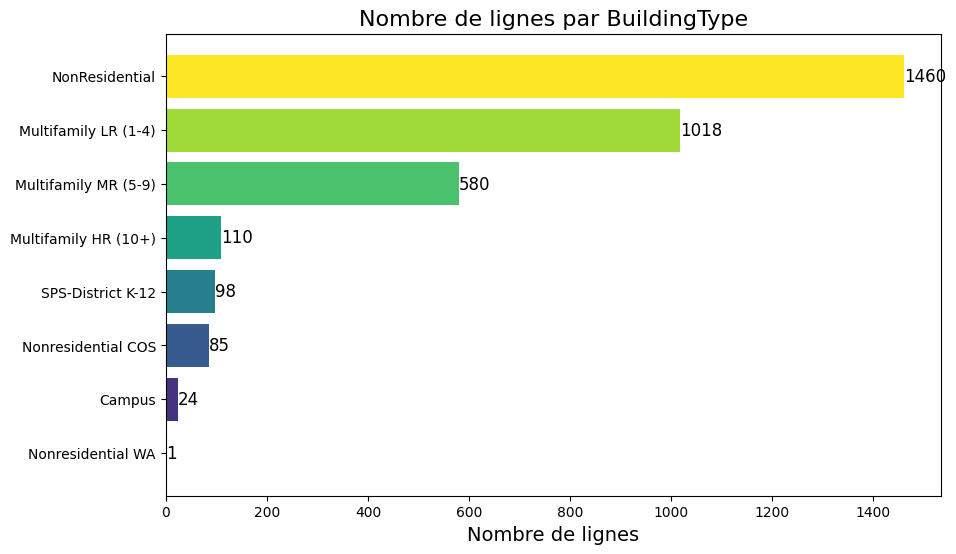

In [733]:
visualisation(df_building_clean[['BuildingType']])

Pour ne concerver que les bâtiments non résidentiels, j'écarte donc les bâtiments résidentiels (Multifamily LR (1-4) ,Multifamily HR (10+),Multifamily MR (5-9) )  
Les autres catégories sont des bâtiments non-résidentiels ('NonResidential' ,'Nonresidential COS', 'Nonresidential WA' ) et scolaires - aussi classés en non-résidentels ('SPS-District K-12', 'Campus' )

In [734]:
excluded_types = ['Multifamily LR (1-4)', 'Multifamily MR (5-9)', 'Multifamily HR (10+)']
df_building_clean = df_building_clean[~df_building_clean['BuildingType'].isin(excluded_types)]

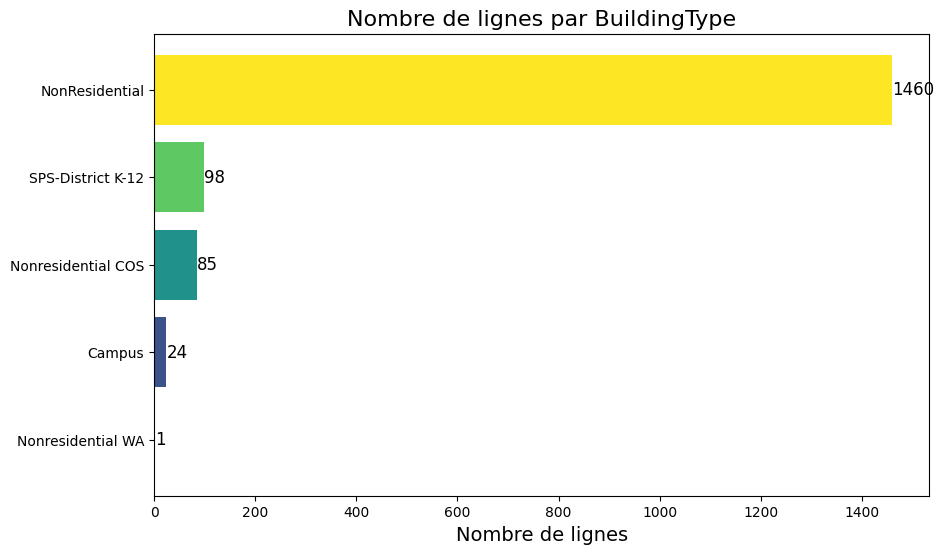

In [735]:
visualisation(df_building_clean[['BuildingType']])

In [736]:
print ("Suite à ce premier filtrage, la taille du jeu de données est de", df_building_clean.shape[0], "lignes et", df_building_clean.shape[1], "colonnes.")
print ("A l'origine, la taille du jeu de données etait de", df_building_raw.shape[0], "lignes et", df_building_raw.shape[1], "colonnes.")

Suite à ce premier filtrage, la taille du jeu de données est de 1668 lignes et 45 colonnes.
A l'origine, la taille du jeu de données etait de 3376 lignes et 46 colonnes.


### 3.2 Caractéristiques communes  - ville, année, état

On peut observer que toutes les données concernent des bâtiments de seattle, en 2016. Cela corresponds à notre périmètre d'étude. Il n'est donc pas utile de concerver ces colonnes.

In [737]:

df_building_clean[['DataYear', 'City', 'State']].value_counts()

DataYear  City     State
2016      Seattle  WA       1668
Name: count, dtype: int64

In [738]:
df_building_clean = df_building_clean.drop(['DataYear', 'City', 'State'], axis=1)

### 3.3 Caracteristiques redondantes par nature

#### 3.3.1 Localisation et identification du bâtiment

Les données sur l'adresse du batiment et du nom du batiment ne seront pas utilisés dans le cadre de l'étude (de donne pas des éléments permettants de caractériser les évolutions de consommations des bâtiments). Nous pouvons les écarter.  
Nous ne garderons que les latitudes et longitudes.

In [739]:
df_building_clean = df_building_clean.drop(['OSEBuildingID','PropertyName','Address','ZipCode','TaxParcelIdentificationNumber','CouncilDistrictCode','Neighborhood'], axis=1)


#### 3.3.2 Usage du bâtiment

Certaines données semblent redondantes :
Par exemple les types d'usages ('PrimaryPropertyType', 'LargestPropertyUseType', ' ListOfAllPropertyUseTypes')

In [740]:
print(df_building_clean[['BuildingType','PrimaryPropertyType', 'LargestPropertyUseType','ListOfAllPropertyUseTypes']].value_counts())

BuildingType        PrimaryPropertyType          LargestPropertyUseType                                ListOfAllPropertyUseTypes                                                                                                                                                                     
NonResidential      Small- and Mid-Sized Office  Office                                                Office                                                                                                                                                                                            113
                    Warehouse                    Non-Refrigerated Warehouse                            Non-Refrigerated Warehouse                                                                                                                                                                        101
SPS-District K-12   K-12 School                  K-12 School                                           K

On voit que ces 3 variables sont assez détaillées concernant le type d'usage des bâtiments, 'LargestPropertyUseType' et 'ListOfAllPropertyUseTypes', donnant des indications plus précises, mais sans doute trop nombreuses. Nous ferons le choix de conserver 'PrimaryPropertyType', 

In [741]:
df_building_clean = df_building_clean.drop(['BuildingType','LargestPropertyUseType','ListOfAllPropertyUseTypes'], axis=1)


In [742]:
df_building_clean = df_building_clean.drop(['SecondLargestPropertyUseType','SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseType','ThirdLargestPropertyUseTypeGFA'], axis=1)

#### 3.3.3 Données sur les surfaces

Plusieurs éléments sur la surface sont indiquées : PropertyGFATotal : surface des batiments + parking  
  PropertyGFAParking : surface des parkings     
 PropertyGFABuilding(s) : surface des bâtiments 
 LargestPropertyUseTypeGFA : surface du bâtiment principale (usage principal)
 Au regard de notre étude, nous ne concerverons que la surface des bâtiments et celle du parking.

In [743]:
df_building_clean = df_building_clean.drop(['PropertyGFATotal', 'LargestPropertyUseTypeGFA'], axis=1)

#### 3.3.4 Données sur la consommation en électricité

Pour que toutes tes variables énergétiques soient sur la même échelle et comparables, ce qui simplifie la modélisation et évite les confusions d’unités. On ne garde les caractéristiques en kbTu
*kBtu = kilo British thermal unit → unité d’énergie.
On l’utilise pour comparer toutes les énergies (électricité, gaz, vapeur) sur la même échelle, plutôt que mélanger kWh et therms. On écarte celle normalisée pour la météo (WN),utile pour l’analyse de performance corrigée, mais pas nécessaire pour prédire la consommation brute.. 

In [744]:
df_building_clean = df_building_clean.drop([
    'SiteEUI(kBtu/sf)', 
    'SourceEUI(kBtu/sf)',
    'SiteEnergyUseWN(kBtu)',
    'Electricity(kWh)',
    'NaturalGas(therms)'
], axis=1)

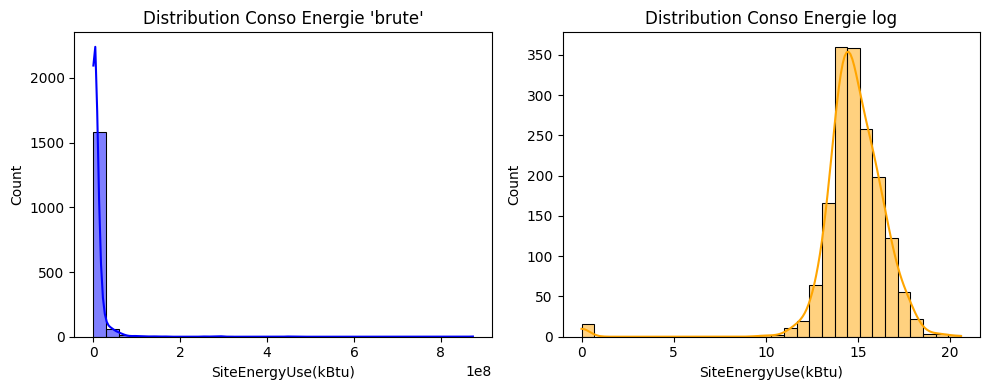

In [745]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

# Conso brute
sns.histplot(df_building_clean['SiteEnergyUse(kBtu)'], bins=30, kde=True, color='blue', ax=axes[0])
axes[0].set_title("Distribution Conso Energie 'brute'")

# Conso log
sns.histplot(np.log1p(df_building_clean['SiteEnergyUse(kBtu)']), bins=30, kde=True, color='orange', ax=axes[1])
axes[1].set_title("Distribution Conso Energie log")

plt.tight_layout()
plt.show()

# # Emissions
# sns.histplot(df_building_clean['TotalGHGEmissions'], bins=30, kde=True, color='blue', ax=axes[1, 0])
# axes[0].set_title("Distribution Emissions GES 'brute'")

# sns.histplot(np.log1p(df_building_clean['TotalGHGEmissions']), bins=30, kde=True, color='orange', ax=axes[1, 1])
# axes[1].set_title("Distribution Emissions GES passée au log")

#### 3.3.5 Les indicateurs de performance énergétique

Au regard de objectif actuel : prédire les émissions totales et la consommation totale d’énergie
je garde les totaux,
je supprime les ratios par surface (SiteEUIWN(kBtu/sf), SourceEUIWN(kBtu/sf), GHGEmissionsIntensity).

In [746]:
df_building_clean = df_building_clean.drop([
    'SiteEUIWN(kBtu/sf)',
    'GHGEmissionsIntensity',
    'SourceEUIWN(kBtu/sf)',
    'YearsENERGYSTARCertified',
    'ENERGYSTARScore'
], axis=1)

### 3.4 Métadonnée

In [747]:
df_building_clean[['DefaultData','ComplianceStatus']].value_counts()

DefaultData  ComplianceStatus            
False        Compliant                       1548
True         Error - Correct Default Data      88
False        Non-Compliant                     18
             Missing Data                      14
Name: count, dtype: int64

D'après la definition des variables(https://data.seattle.gov/Built-Environment/Building-Energy-Benchmarking-Data-2015-Present/teqw-tu6e/about_data), Les lignes où ComplianceStatus vaut "Error - Correct Default Data", "missing data" et non-compliant" indiquent que les données n’ont pas été correctement reportées et ont pu étre remplacées par des valeurs par défaut, donc elles ne reflètent pas la performance réelle du bâtiment.  Les garder pourrait biaiser tes statistiques et modèles. On va donc les supprimer.

In [748]:
df_building_clean = df_building_clean[df_building_clean['ComplianceStatus'] == 'Compliant']

In [749]:
df_building_clean = df_building_clean.drop(columns=['ComplianceStatus', 'Outlier','DefaultData'])

### 3.5. Conclusion pré-selections des variables

In [750]:
print ("Suite à cette selections des variables, la taille du jeu de données est de", df_building_clean.shape[0], "lignes et", df_building_clean.shape[1], "colonnes.")
print ("A l'origine, la taille du jeu de données etait de", df_building_raw.shape[0], "lignes et", df_building_raw.shape[1], "colonnes.")

Suite à cette selections des variables, la taille du jeu de données est de 1548 lignes et 13 colonnes.
A l'origine, la taille du jeu de données etait de 3376 lignes et 46 colonnes.


In [751]:
df_building_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1548 entries, 0 to 3375
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PrimaryPropertyType     1548 non-null   object 
 1   Latitude                1548 non-null   float64
 2   Longitude               1548 non-null   float64
 3   YearBuilt               1548 non-null   int64  
 4   NumberofBuildings       1548 non-null   float64
 5   NumberofFloors          1548 non-null   int64  
 6   PropertyGFAParking      1548 non-null   int64  
 7   PropertyGFABuilding(s)  1548 non-null   int64  
 8   SiteEnergyUse(kBtu)     1548 non-null   float64
 9   SteamUse(kBtu)          1548 non-null   float64
 10  Electricity(kBtu)       1548 non-null   float64
 11  NaturalGas(kBtu)        1548 non-null   float64
 12  TotalGHGEmissions       1548 non-null   float64
dtypes: float64(8), int64(4), object(1)
memory usage: 169.3+ KB


**Conclusion du cleaning :**

 Ces caractéristiques se répartissent en plusieurs attributs des bâtiments :  

- Les types de bâtiments : filtre : on concerve que les bâtiments non résidentiel

- La localisation (adresse, logitude - latitude) : on ne garde que longitude - latitude  

- Années de constructions  : on concerve

- Nombre de bâtiments et d'étages : on a concervé pour l'instant 

- Surface (PropertyGFATotal (surface parking+ batiments), PropertyGFABuilding(s) (Surface des bâtiments)) : on ne converve que la surface des bâtiments

- Type d'usage et consommation par type d'usage : on ne concerve que le primary type d'usage 

- Performances énergériques : ENERGYSTARScore, Énergie consommée / surface...   : suppression des calculs de perfomances énergétique

- Consommation énergétiques, en différentes unités : kBtu, kWh, kBtu, therms, kBtu : on a garder que les kBtu

- Émissions de GES : TotalGHGEmissions, GHGEmissionsIntensity   : on supprime le ratio et on ne garde que le totaux

Variables 'autres' : Comments, DefaultData, ComplianceStatus, Outlier.. : écarté après avoir été utilisé pour filtré les bâtiments n'ayant pas de données correctes



In [752]:
df_building_clean.shape

(1548, 13)

## 5. Nettoyage des données

### 5.1 Variables cibles

In [753]:
variables_cibles = ['TotalGHGEmissions','SiteEnergyUse(kBtu)']

#### 5.1.1 Les valeurs manquantes

In [754]:
missing_data = df_building_clean[
    (df_building_clean['TotalGHGEmissions'].isna()) |
    (df_building_clean['SiteEnergyUse(kBtu)'].isna())
]

missing_data

,PrimaryPropertyType,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFAParking,PropertyGFABuilding(s),SiteEnergyUse(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),TotalGHGEmissions


Nous n'avons pas de valeurs manquantes

In [755]:
# Supprimer les lignes présentes dans missing data
# df_building_clean = df_building_clean.drop(missing_data.index).copy()

#### 5.1.2 Les valeurs nulles et incohérentes (0 ou <0>)

In [756]:

df_building_clean[variables_cibles].describe()

,TotalGHGEmissions,SiteEnergyUse(kBtu)
count,1548.000000,1.548000e+03
mean,193.608908,8.860058e+06
std,779.105278,3.130568e+07
min,-0.800000,5.713320e+04
25%,20.655000,1.251083e+06
50%,49.845000,2.732167e+06
75%,147.227500,7.294487e+06
max,16870.980000,8.739237e+08


In [757]:
data_incoherente = df_building_clean[
            (df_building_clean['TotalGHGEmissions'] <= 0) | 
            (df_building_clean['SiteEnergyUse(kBtu)'] <= 0)
        ]

data_incoherente

,PrimaryPropertyType,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFAParking,PropertyGFABuilding(s),SiteEnergyUse(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),TotalGHGEmissions
513,Supermarket / Grocery Store,47.63718,-122.37734,2008,1.0,1,0,57176,1.252517e+07,0.0,0.0,0.0,0.0
3206,Small- and Mid-Sized Office,47.61432,-122.31257,2013,1.0,6,0,52000,3.427261e+05,0.0,-115417.0,0.0,-0.8


In [758]:
data_incoherente.shape

(2, 13)

Les batiments aux résultats = 0 On peut les supprimer

In [759]:
# Supprimer les lignes présentes dans data_incoherente
df_building_clean = df_building_clean.drop(data_incoherente.index).copy()

In [760]:
df_building_clean[variables_cibles].describe()

,TotalGHGEmissions,SiteEnergyUse(kBtu)
count,1546.00000,1.546000e+03
mean,193.85989,8.863197e+06
std,779.57810,3.132504e+07
min,0.40000,5.713320e+04
25%,20.76000,1.252679e+06
50%,49.94000,2.732167e+06
75%,147.40250,7.286407e+06
max,16870.98000,8.739237e+08


Il n'y a plus de valeur minimal <= à 0

#### 5.1.2 Détection  des outliers

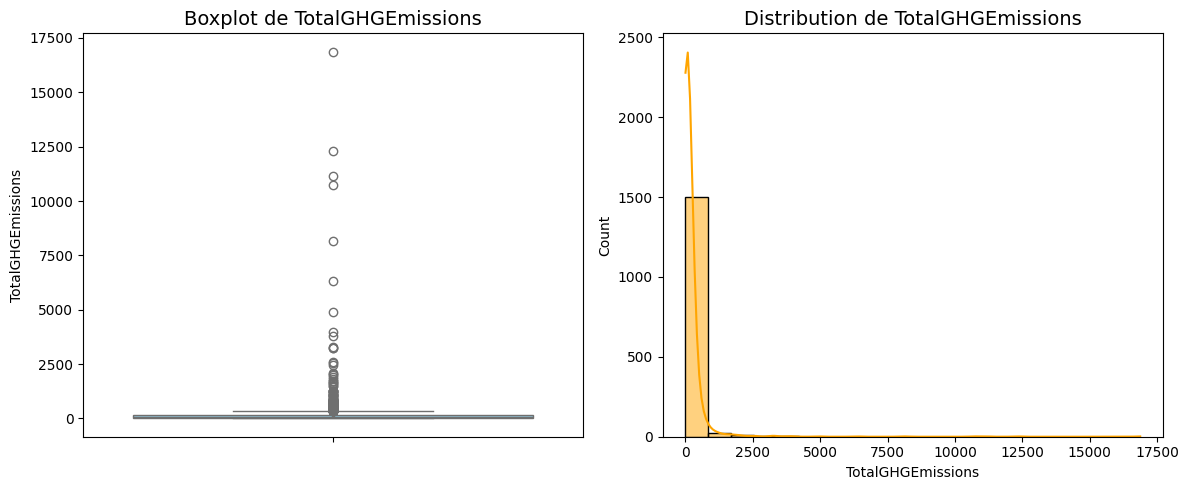

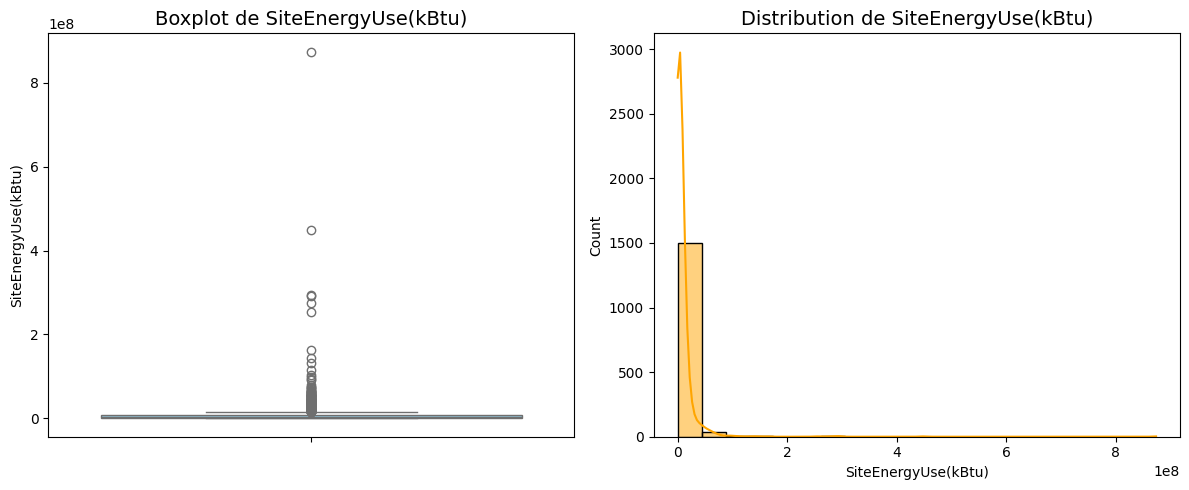

In [761]:
visualisation(df_building_clean[variables_cibles])

In [762]:


def plot_outliers (df, cols, xlim=(-1,6), figsize=(5,5)):
    
    for var in cols:
        # Calcul des z-scores
        df[f"z_{var}"] = stats.zscore(df[var], nan_policy='omit')
        
        # Histogramme
        plt.figure(figsize=(figsize[0]*1.5, figsize[1]))
        sns.histplot(df[f"z_{var}"], bins=30, kde=True, color='skyblue')
        plt.grid(True, which='both')
        plt.title(f'{var} - z-score')
        plt.xlim(xlim)
        plt.show()
        
        # Seuil ±3
        nb_var_out_max3 = df[df[f"z_{var}"] > 3].shape[0]
        nb_var_out_min3 = df[df[f"z_{var}"] < -3].shape[0]
        var_max_3std = df.loc[df[f"z_{var}"] <= 3, var].max()
        var_min_3std = df.loc[df[f"z_{var}"] >= -3, var].min()
        
        print("")
        print(f"{var} :")
        print(f"Avec un seuil à 3 écart-type, la valeur max de {var} serait de: {var_max_3std} et on a {nb_var_out_max3} bâtiments au-delà de ce seuil.")
        print(f"Avec un seuil à 3 écart-type, la valeur min de {var} serait de: {var_min_3std} et on a {nb_var_out_min3} bâtiments en-deça de ce seuil.")

         # Suppression de la colonne z-score
        df.drop(columns=[f"z_{var}"], inplace=True)
     

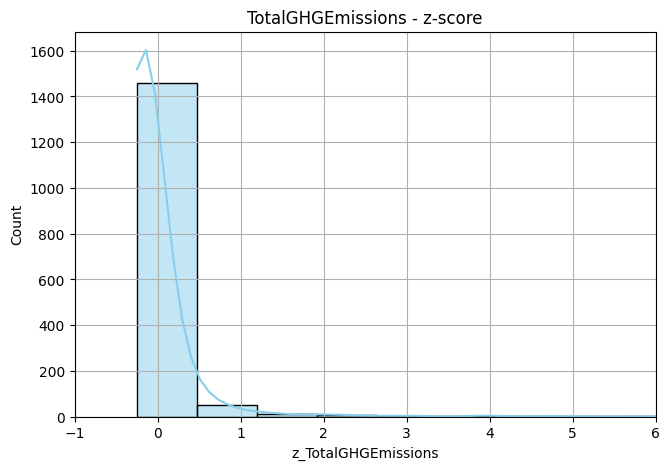


TotalGHGEmissions :
Avec un seuil à 3 écart-type, la valeur max de TotalGHGEmissions serait de: 2451.58 et on a 14 bâtiments au-delà de ce seuil.
Avec un seuil à 3 écart-type, la valeur min de TotalGHGEmissions serait de: 0.4 et on a 0 bâtiments en-deça de ce seuil.


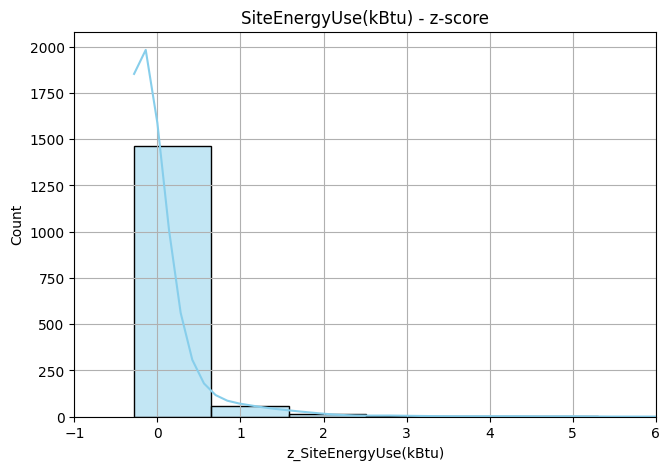


SiteEnergyUse(kBtu) :
Avec un seuil à 3 écart-type, la valeur max de SiteEnergyUse(kBtu) serait de: 102673696.0 et on a 10 bâtiments au-delà de ce seuil.
Avec un seuil à 3 écart-type, la valeur min de SiteEnergyUse(kBtu) serait de: 57133.19922 et on a 0 bâtiments en-deça de ce seuil.


In [763]:
plot_outliers(df_building_clean, variables_cibles)

Je supprime les outliers avex le seuil à 3 écart-type

In [764]:
def remove_outliers(df, cols, threshold=3):
    df_clean = df.copy()
    for col in cols:
        df_clean[f"z_{col}"] = stats.zscore(df_clean[col], nan_policy='omit')
        df_clean = df_clean[(df_clean[f"z_{col}"].abs() <= threshold) | (df_clean[f"z_{col}"].isna())]
    df_clean = df_clean.drop(columns=[f"z_{col}" for col in cols])
    
    # Visualisation du DataFrame nettoyé
    visualisation(df_clean[cols])
    
    return df_clean

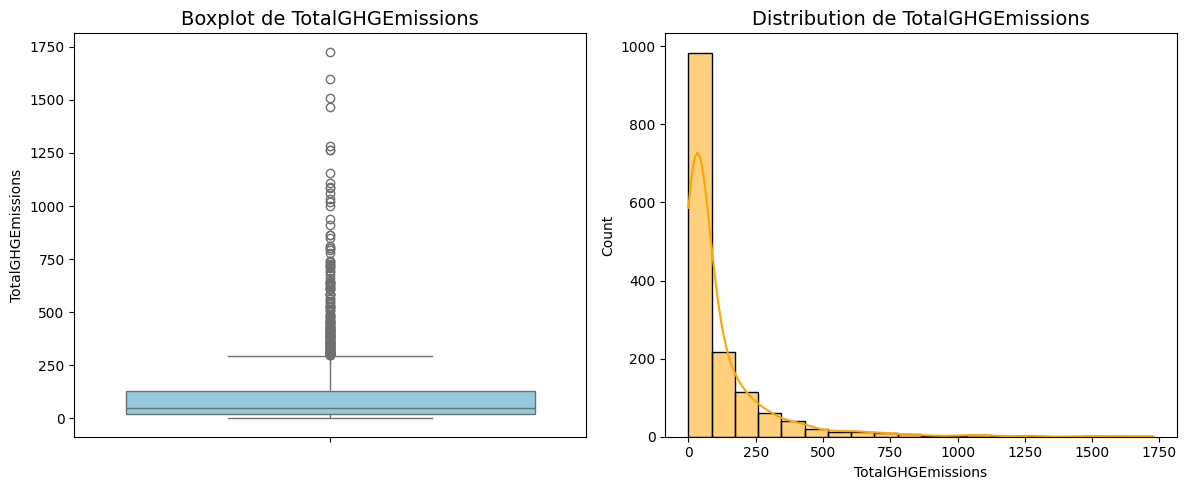

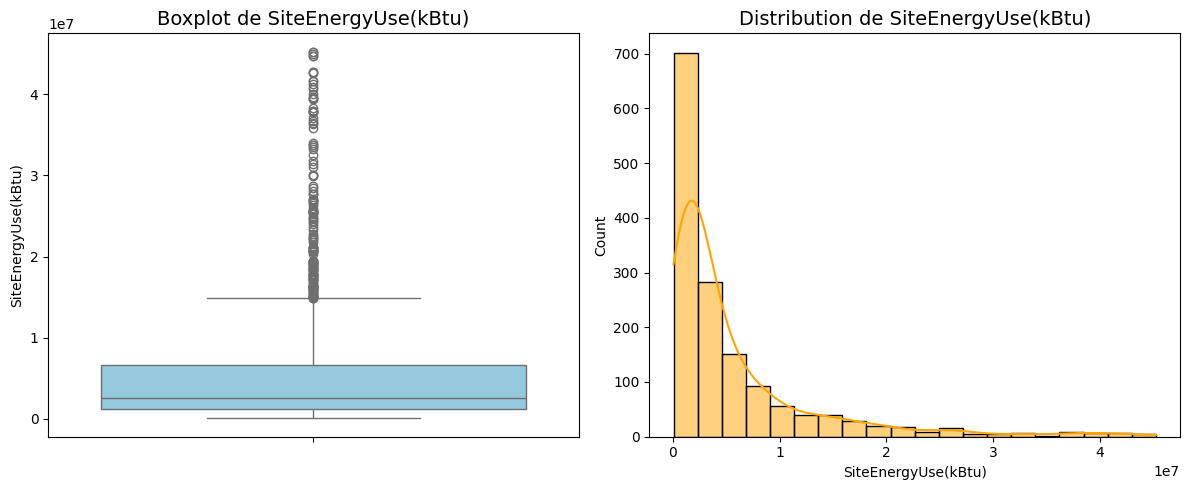

In [765]:
df_building_clean = remove_outliers(df_building_clean,variables_cibles,threshold=3)

### 5.2 Variables explicatives

In [766]:
variables_explicatives_num = df_building_clean.select_dtypes(include=['int64', 'float64','bool']).drop(columns=['SiteEnergyUse(kBtu)', 'TotalGHGEmissions']).columns.tolist()
variables_explicatives_num 

variables_explicatives_cat = [
    'PrimaryPropertyType'
]

Je commence par les variables explicatives numérique

#### 5.2.1 Description des variables numériques

=== Latitude ===


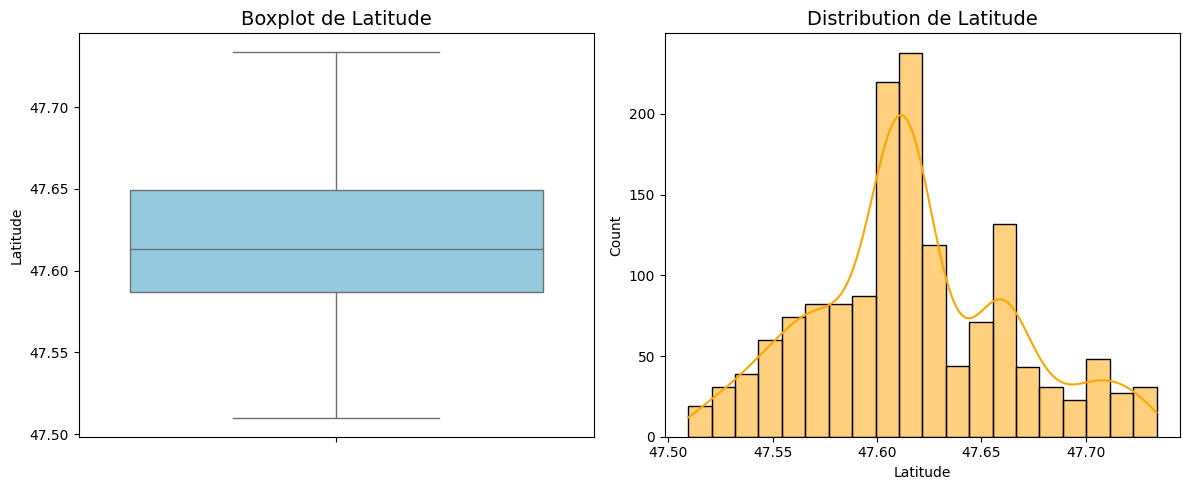

count    1501.000000
mean       47.616534
std         0.047394
min        47.509590
25%        47.586850
50%        47.612900
75%        47.649340
max        47.733870
Name: Latitude, dtype: float64 

=== Longitude ===


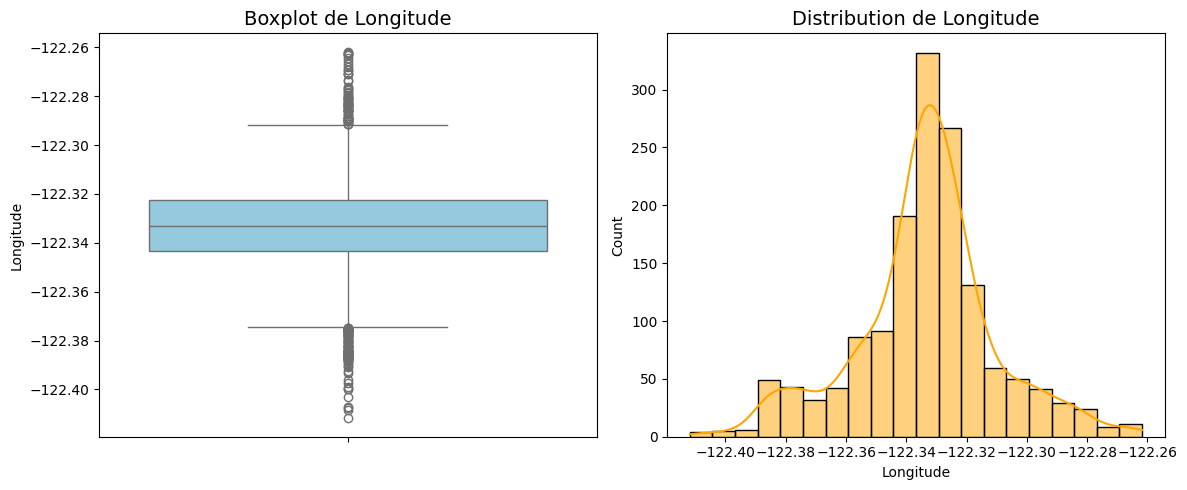

count    1501.000000
mean     -122.333619
std         0.023415
min      -122.411820
25%      -122.343380
50%      -122.333160
75%      -122.322640
max      -122.261800
Name: Longitude, dtype: float64 

=== YearBuilt ===


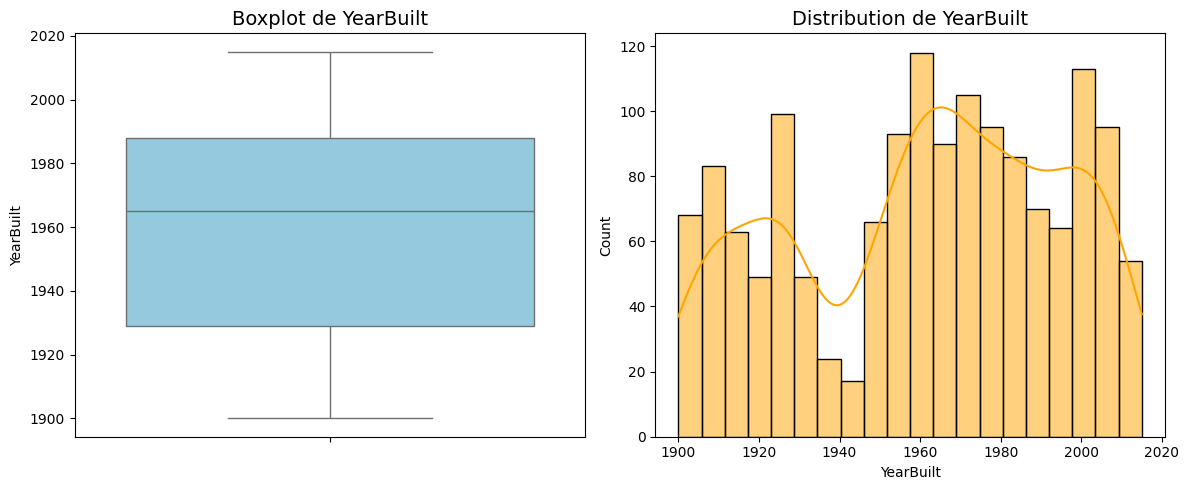

count    1501.000000
mean     1961.095270
std        32.883972
min      1900.000000
25%      1929.000000
50%      1965.000000
75%      1988.000000
max      2015.000000
Name: YearBuilt, dtype: float64 

=== NumberofBuildings ===


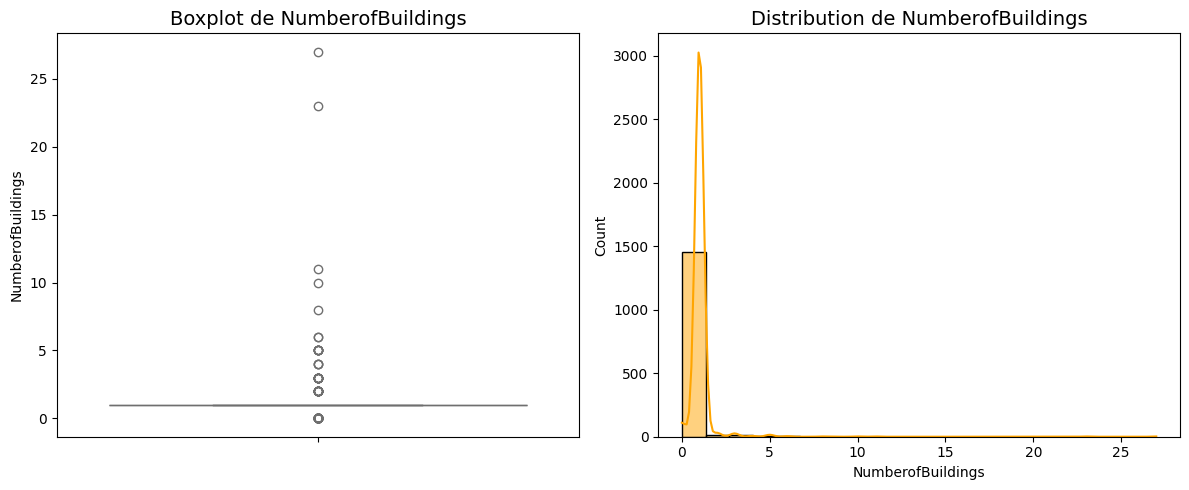

count    1501.000000
mean        1.072618
std         1.059272
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max        27.000000
Name: NumberofBuildings, dtype: float64 

=== NumberofFloors ===


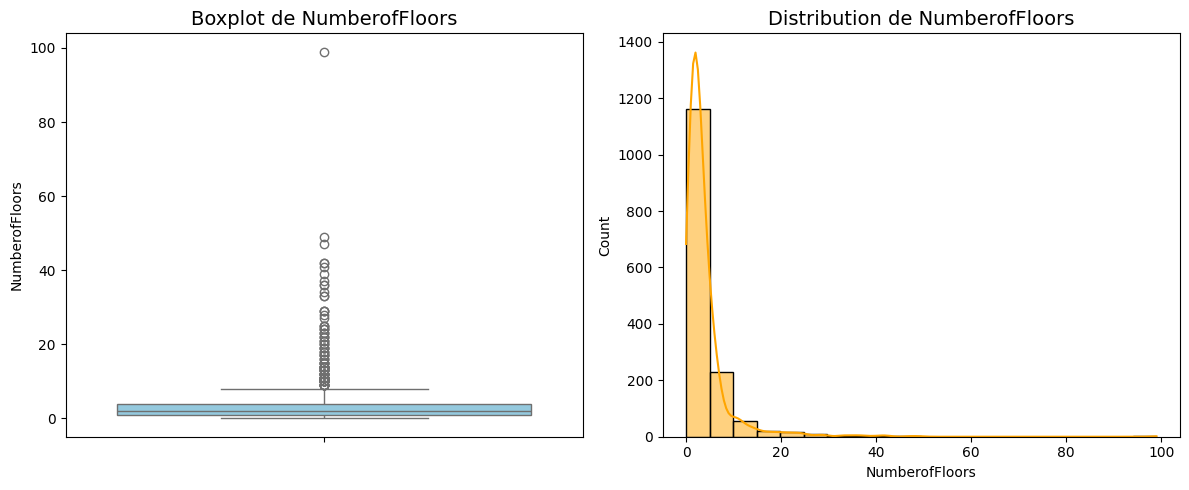

count    1501.000000
mean        3.894737
std         5.571916
min         0.000000
25%         1.000000
50%         2.000000
75%         4.000000
max        99.000000
Name: NumberofFloors, dtype: float64 

=== PropertyGFAParking ===


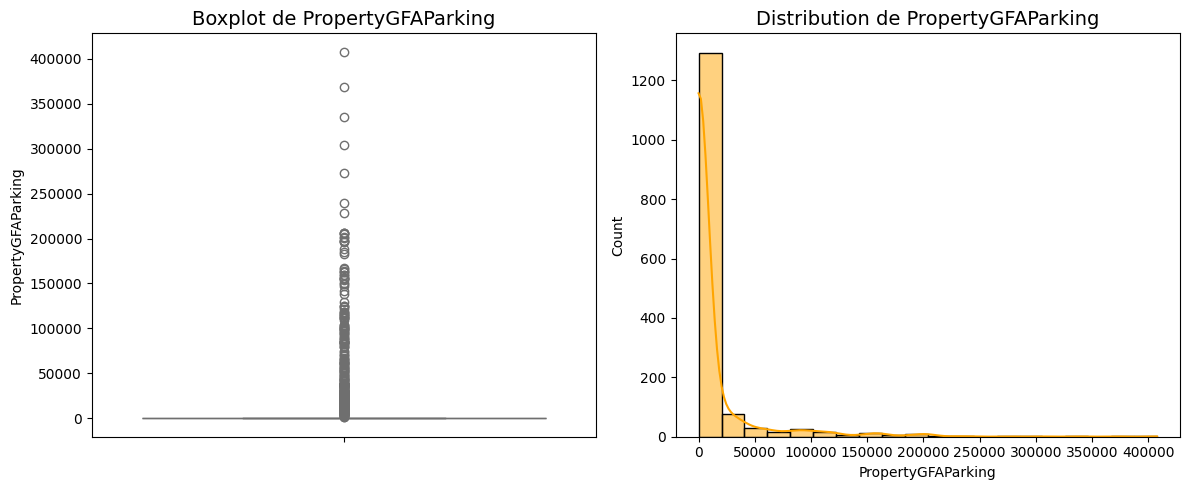

count      1501.000000
mean      12109.417722
std       37607.952549
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max      407795.000000
Name: PropertyGFAParking, dtype: float64 

=== PropertyGFABuilding(s) ===


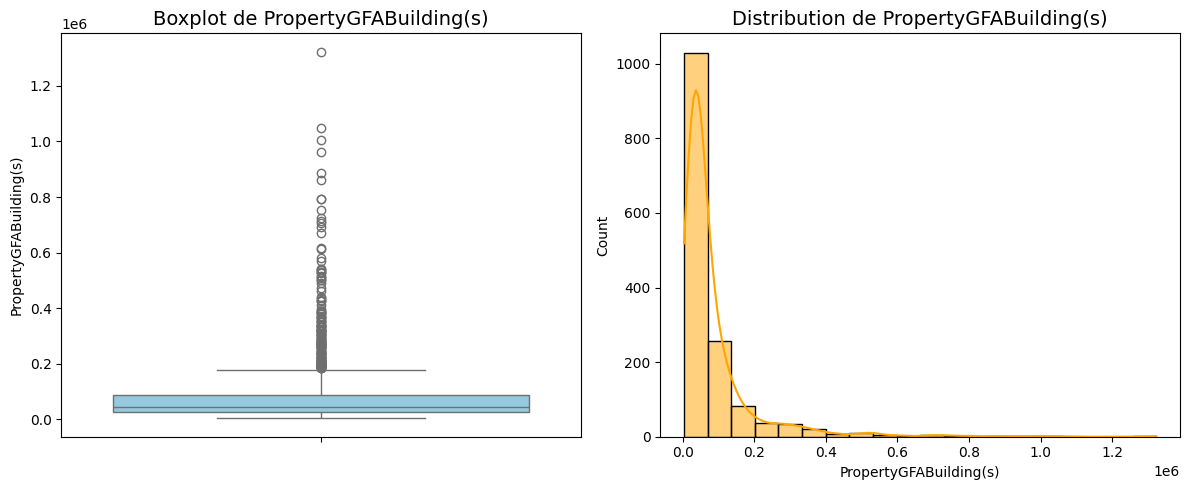

count    1.501000e+03
mean     8.413993e+04
std      1.163358e+05
min      3.636000e+03
25%      2.764200e+04
50%      4.477500e+04
75%      8.920000e+04
max      1.323055e+06
Name: PropertyGFABuilding(s), dtype: float64 

=== SteamUse(kBtu) ===


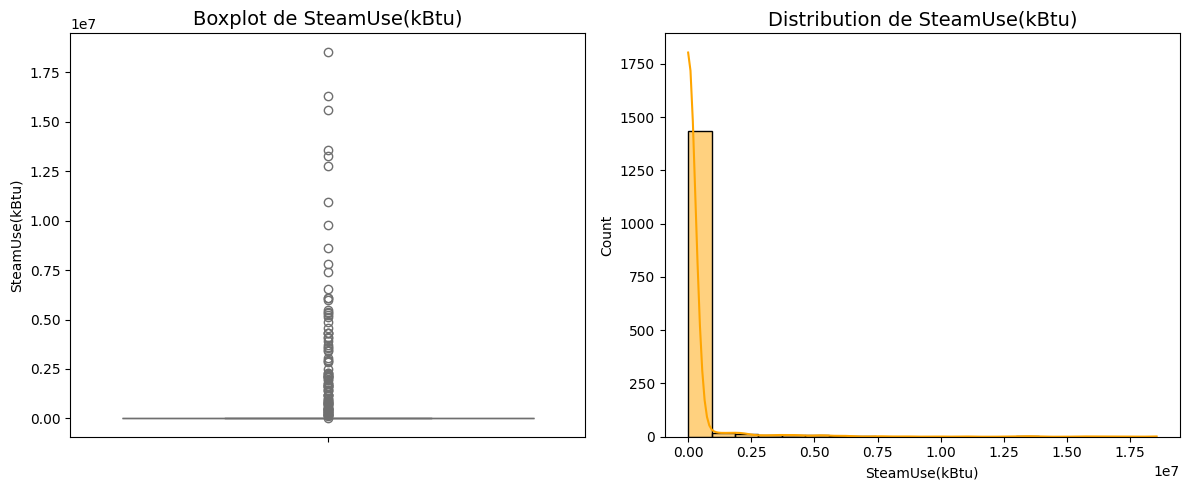

count    1.501000e+03
mean     2.102100e+05
std      1.253827e+06
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.854786e+07
Name: SteamUse(kBtu), dtype: float64 

=== Electricity(kBtu) ===


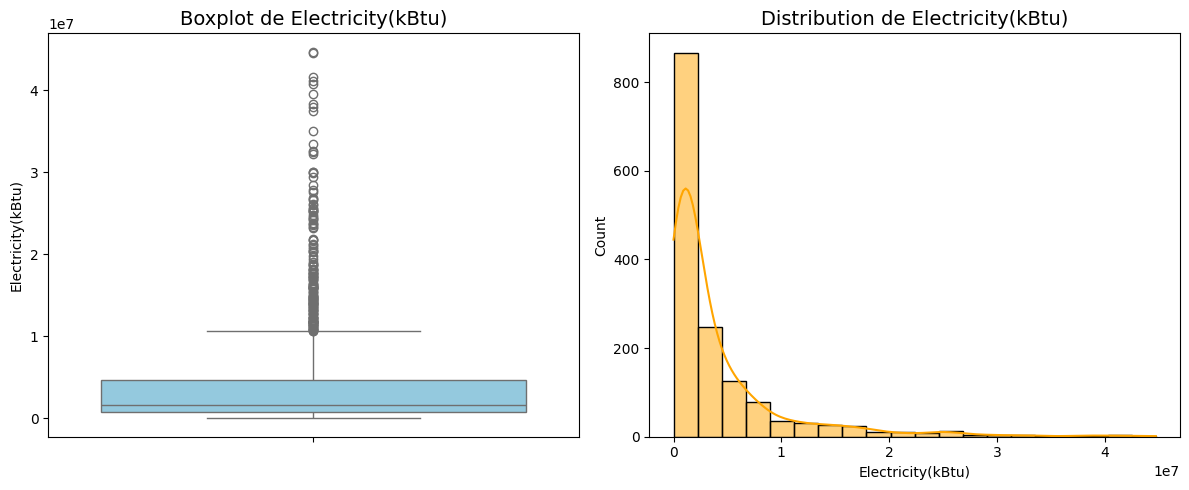

count    1.501000e+03
mean     4.073080e+06
std      6.112082e+06
min      0.000000e+00
25%      7.209450e+05
50%      1.618916e+06
75%      4.685851e+06
max      4.473115e+07
Name: Electricity(kBtu), dtype: float64 

=== NaturalGas(kBtu) ===


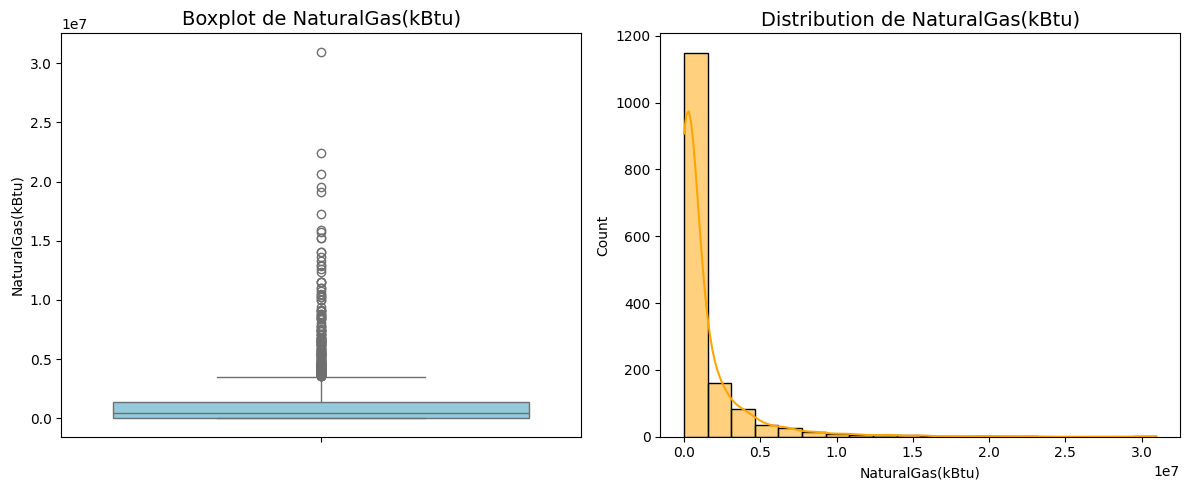

count    1.501000e+03
mean     1.359922e+06
std      2.560746e+06
min      0.000000e+00
25%      0.000000e+00
50%      4.681170e+05
75%      1.416041e+06
max      3.096730e+07
Name: NaturalGas(kBtu), dtype: float64 



In [767]:
for col in variables_explicatives_num:
    print(f"=== {col} ===")
    visualisation(df_building_clean[[col]])
    print(df_building_clean[col].describe(), "\n")

#### 5.2.2 Suppression des des outliers

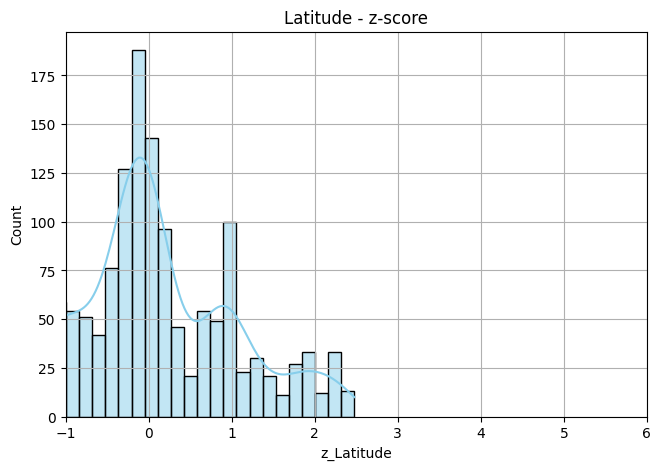


Latitude :
Avec un seuil à 3 écart-type, la valeur max de Latitude serait de: 47.73387 et on a 0 bâtiments au-delà de ce seuil.
Avec un seuil à 3 écart-type, la valeur min de Latitude serait de: 47.50959 et on a 0 bâtiments en-deça de ce seuil.


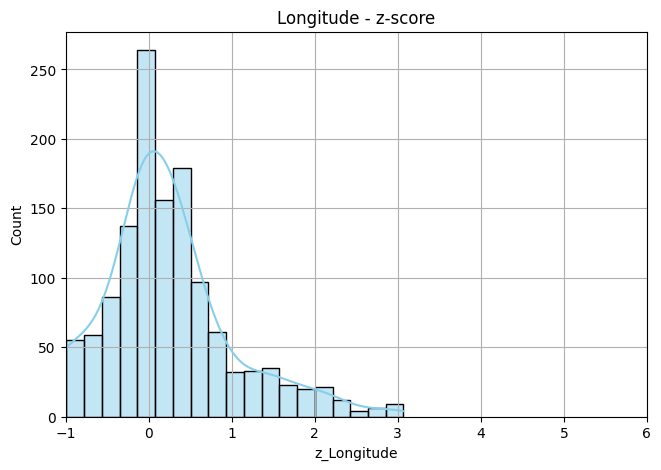


Longitude :
Avec un seuil à 3 écart-type, la valeur max de Longitude serait de: -122.26456 et on a 6 bâtiments au-delà de ce seuil.
Avec un seuil à 3 écart-type, la valeur min de Longitude serait de: -122.4032 et on a 4 bâtiments en-deça de ce seuil.


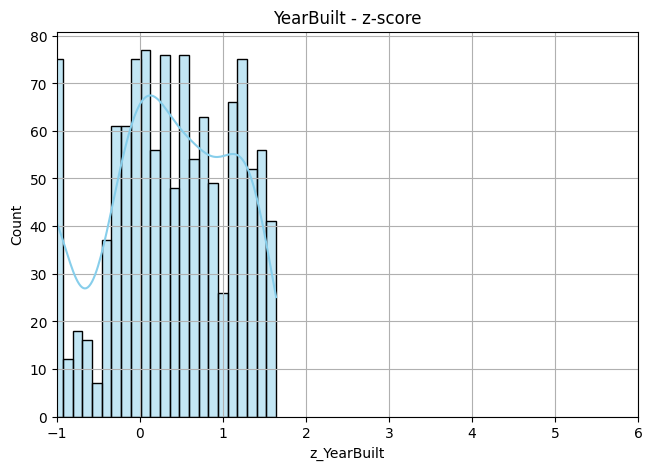


YearBuilt :
Avec un seuil à 3 écart-type, la valeur max de YearBuilt serait de: 2015 et on a 0 bâtiments au-delà de ce seuil.
Avec un seuil à 3 écart-type, la valeur min de YearBuilt serait de: 1900 et on a 0 bâtiments en-deça de ce seuil.


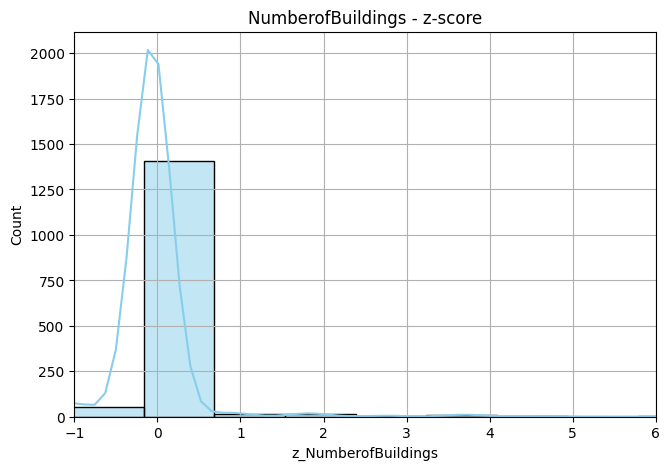


NumberofBuildings :
Avec un seuil à 3 écart-type, la valeur max de NumberofBuildings serait de: 4.0 et on a 14 bâtiments au-delà de ce seuil.
Avec un seuil à 3 écart-type, la valeur min de NumberofBuildings serait de: 0.0 et on a 0 bâtiments en-deça de ce seuil.


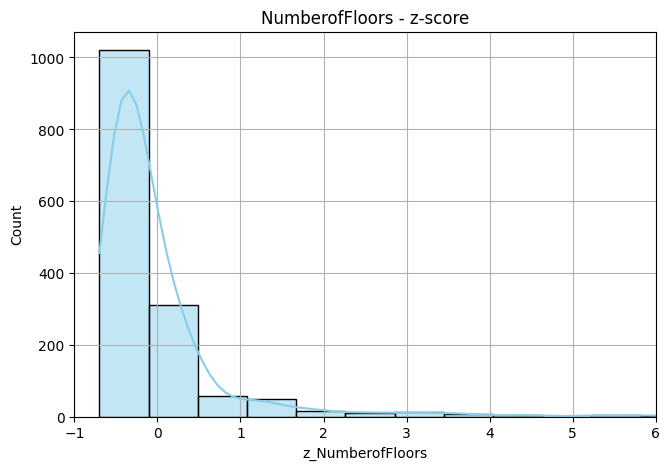


NumberofFloors :
Avec un seuil à 3 écart-type, la valeur max de NumberofFloors serait de: 20 et on a 33 bâtiments au-delà de ce seuil.
Avec un seuil à 3 écart-type, la valeur min de NumberofFloors serait de: 0 et on a 0 bâtiments en-deça de ce seuil.


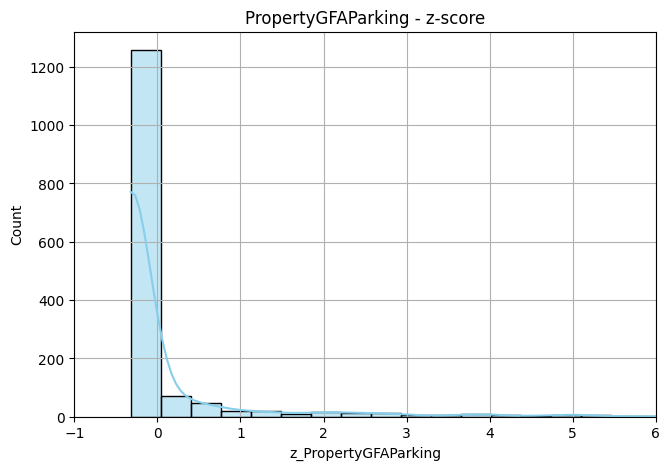


PropertyGFAParking :
Avec un seuil à 3 écart-type, la valeur max de PropertyGFAParking serait de: 124800 et on a 38 bâtiments au-delà de ce seuil.
Avec un seuil à 3 écart-type, la valeur min de PropertyGFAParking serait de: 0 et on a 0 bâtiments en-deça de ce seuil.


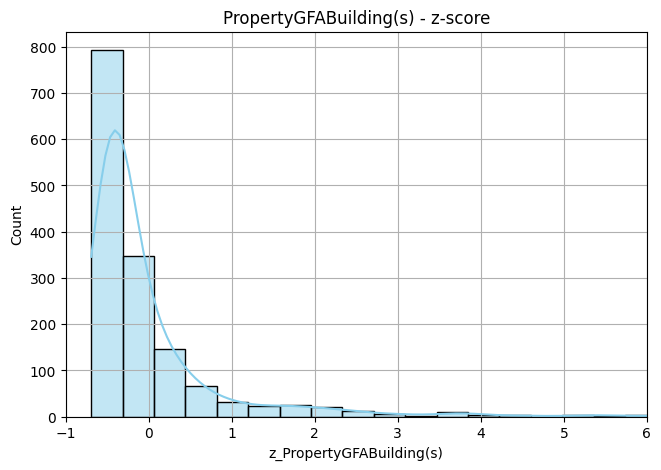


PropertyGFABuilding(s) :
Avec un seuil à 3 écart-type, la valeur max de PropertyGFABuilding(s) serait de: 428347 et on a 34 bâtiments au-delà de ce seuil.
Avec un seuil à 3 écart-type, la valeur min de PropertyGFABuilding(s) serait de: 3636 et on a 0 bâtiments en-deça de ce seuil.


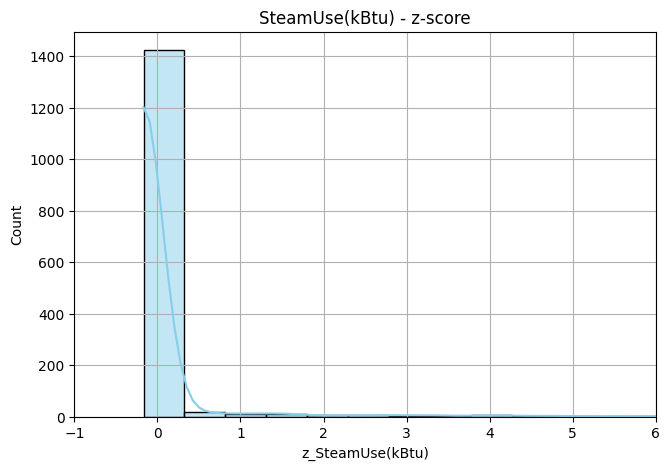


SteamUse(kBtu) :
Avec un seuil à 3 écart-type, la valeur max de SteamUse(kBtu) serait de: 3902781.25 et on a 27 bâtiments au-delà de ce seuil.
Avec un seuil à 3 écart-type, la valeur min de SteamUse(kBtu) serait de: 0.0 et on a 0 bâtiments en-deça de ce seuil.


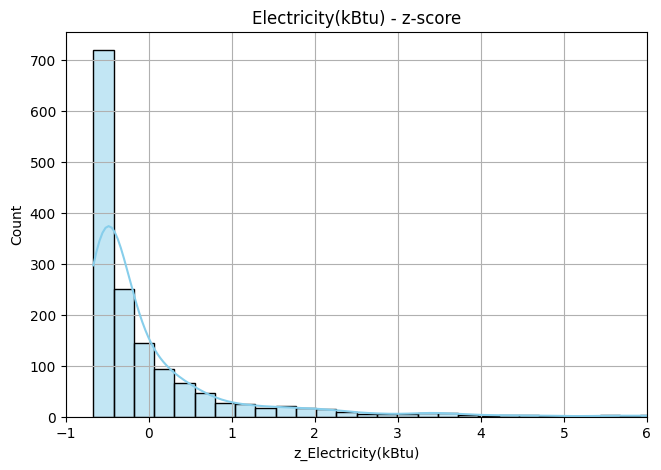


Electricity(kBtu) :
Avec un seuil à 3 écart-type, la valeur max de Electricity(kBtu) serait de: 21930618.0 et on a 42 bâtiments au-delà de ce seuil.
Avec un seuil à 3 écart-type, la valeur min de Electricity(kBtu) serait de: 0.0 et on a 0 bâtiments en-deça de ce seuil.


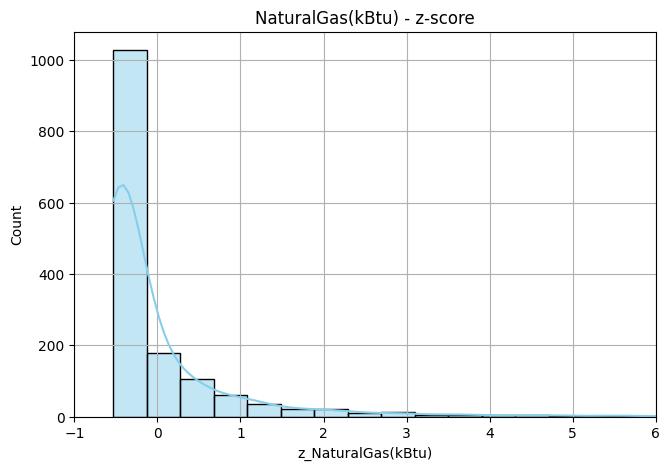


NaturalGas(kBtu) :
Avec un seuil à 3 écart-type, la valeur max de NaturalGas(kBtu) serait de: 8838336.0 et on a 35 bâtiments au-delà de ce seuil.
Avec un seuil à 3 écart-type, la valeur min de NaturalGas(kBtu) serait de: 0.0 et on a 0 bâtiments en-deça de ce seuil.


In [768]:
plot_outliers(df_building_clean,variables_explicatives_num)

je les supprime

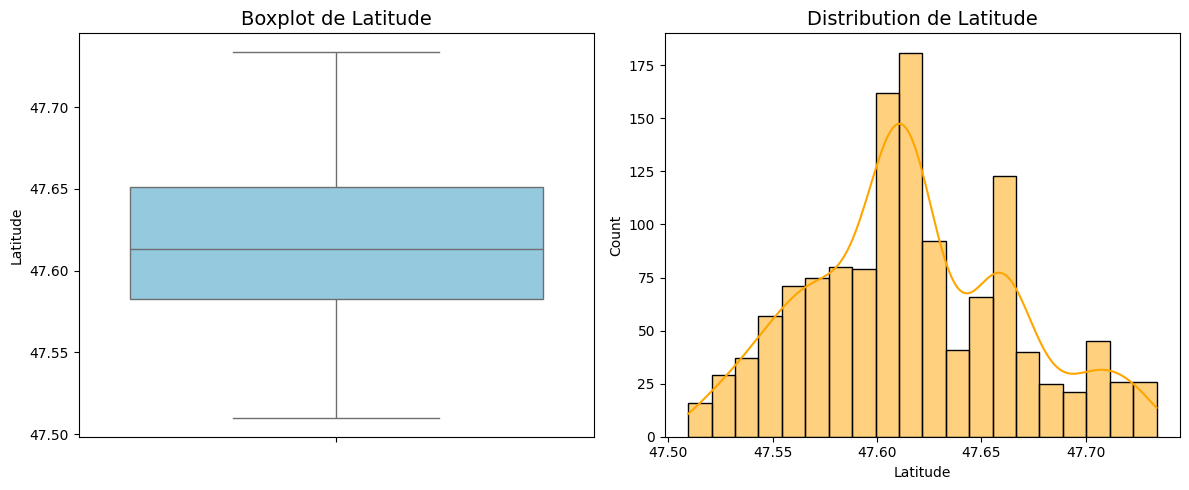

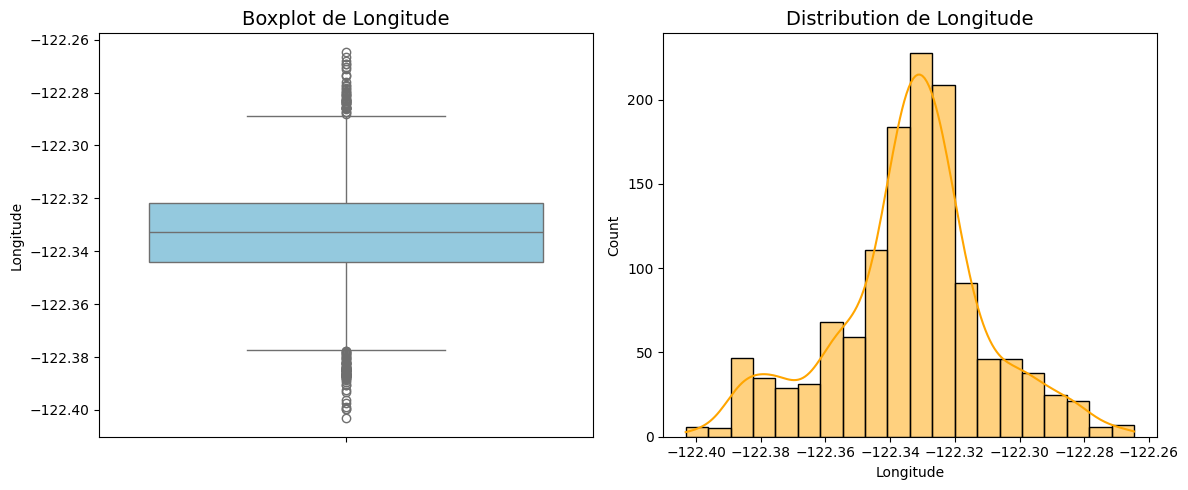

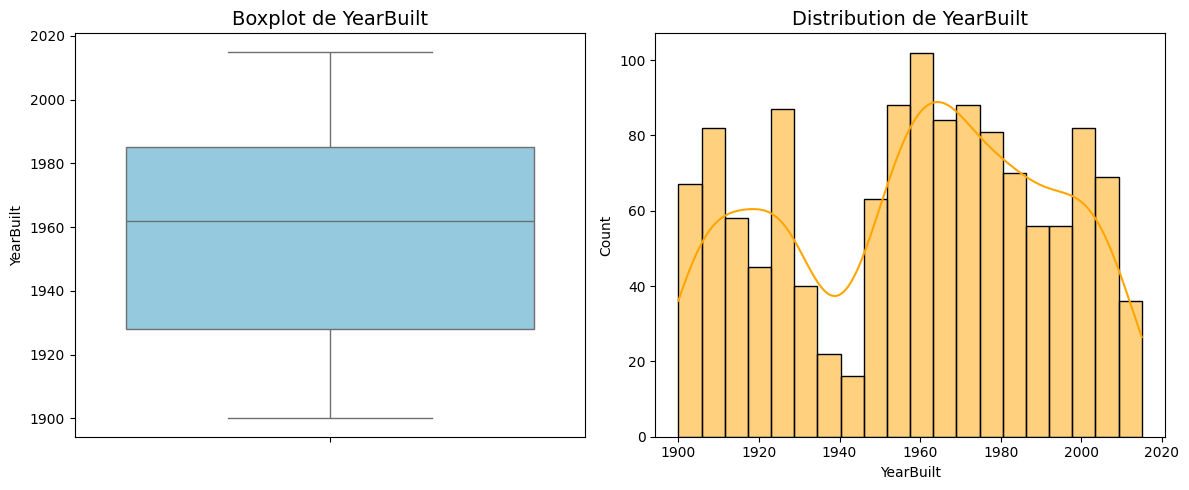

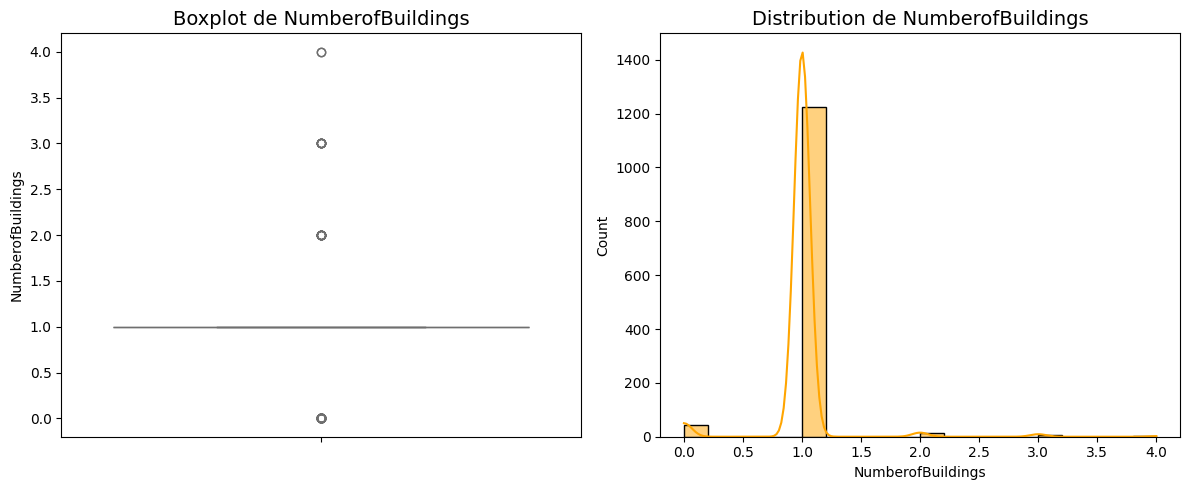

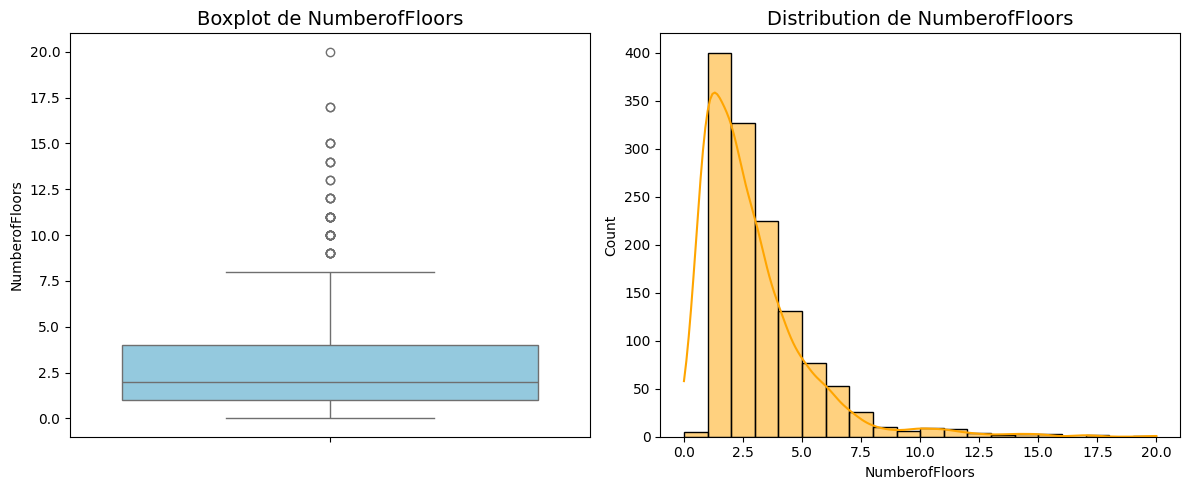

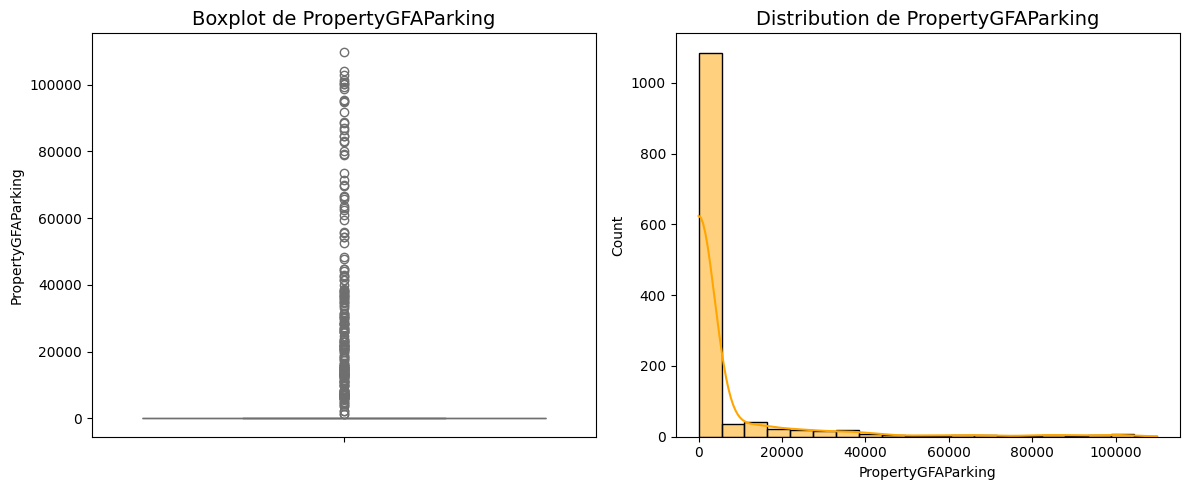

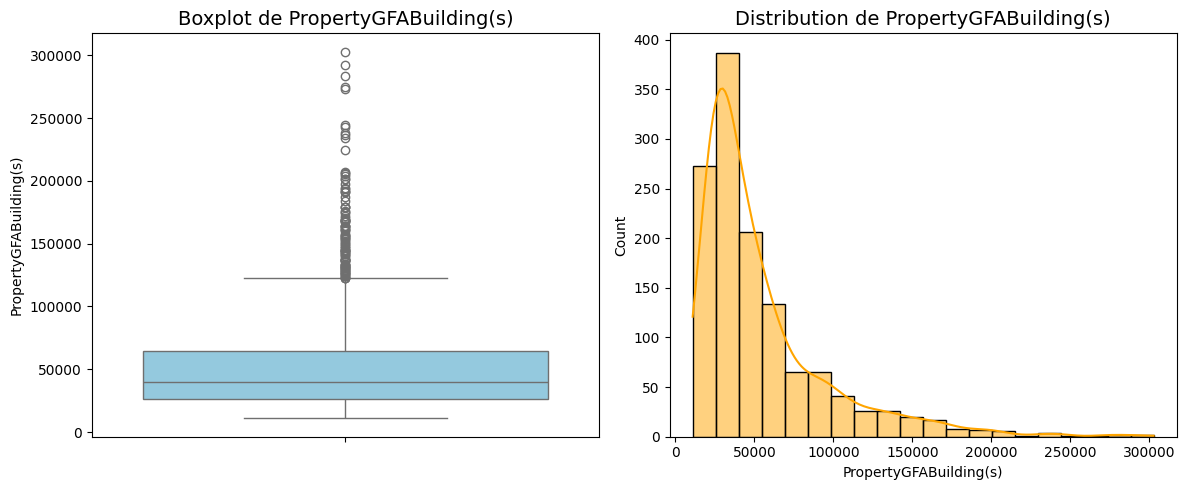

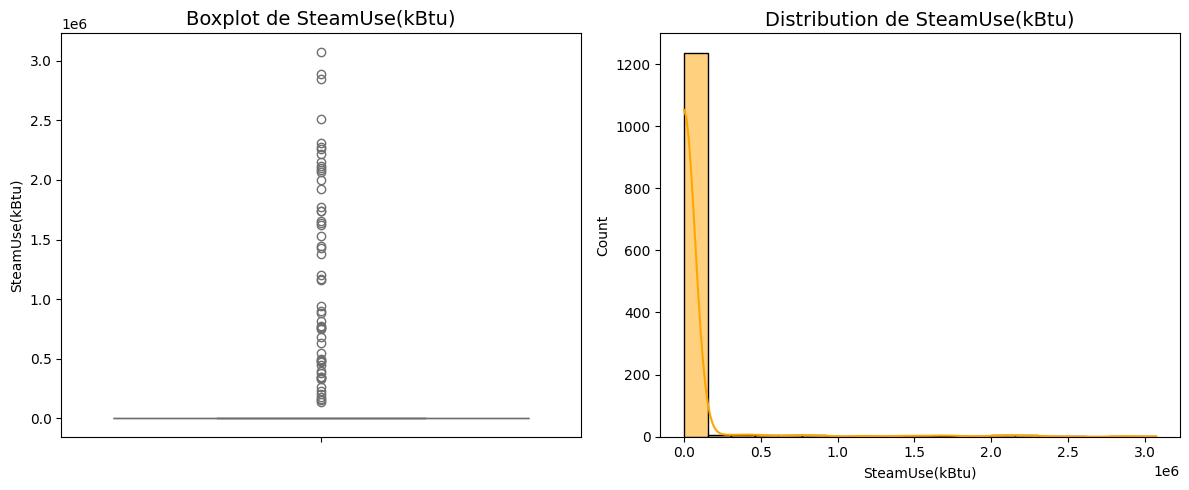

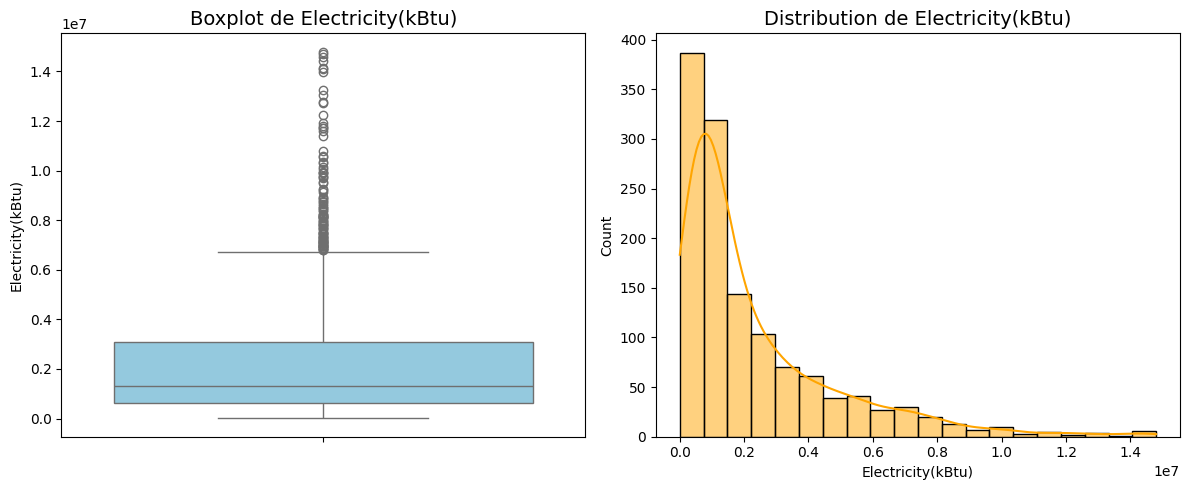

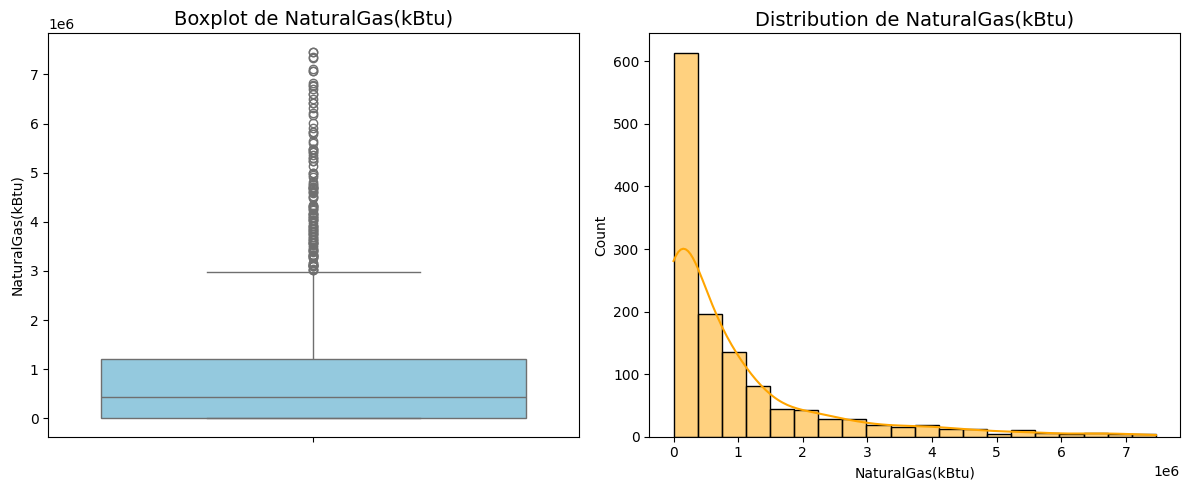

In [769]:
df_building_clean = remove_outliers(df_building_clean,variables_explicatives_num)

J'en profite pour vérifier s'il reste des variables dans la colonnes outliers

In [770]:
df_building_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1292 entries, 0 to 3375
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PrimaryPropertyType     1292 non-null   object 
 1   Latitude                1292 non-null   float64
 2   Longitude               1292 non-null   float64
 3   YearBuilt               1292 non-null   int64  
 4   NumberofBuildings       1292 non-null   float64
 5   NumberofFloors          1292 non-null   int64  
 6   PropertyGFAParking      1292 non-null   int64  
 7   PropertyGFABuilding(s)  1292 non-null   int64  
 8   SiteEnergyUse(kBtu)     1292 non-null   float64
 9   SteamUse(kBtu)          1292 non-null   float64
 10  Electricity(kBtu)       1292 non-null   float64
 11  NaturalGas(kBtu)        1292 non-null   float64
 12  TotalGHGEmissions       1292 non-null   float64
dtypes: float64(8), int64(4), object(1)
memory usage: 141.3+ KB


#### 5.2.3 Description de la variable catégorielle

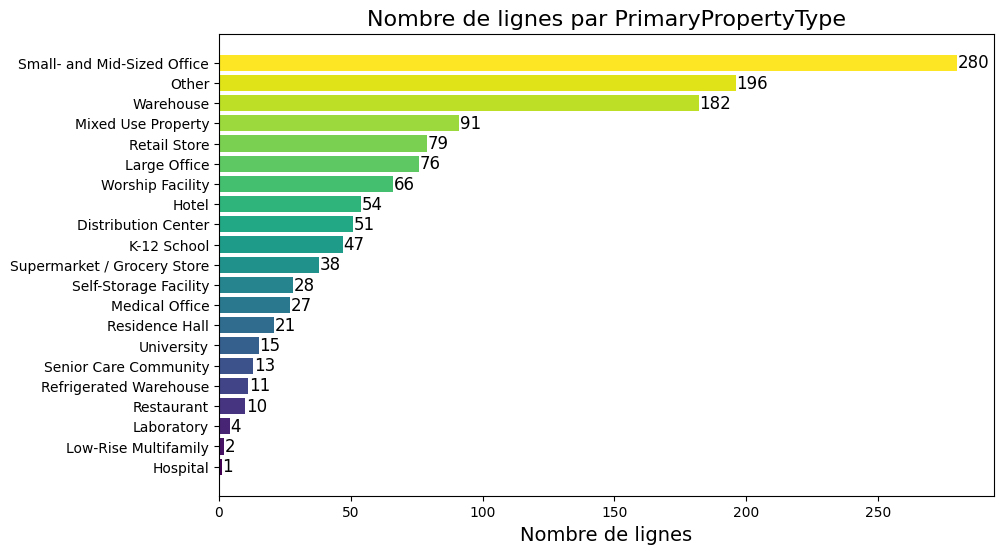

In [771]:
visualisation(df_building_clean[variables_explicatives_cat])

Certaines catégories sont peu représentées ou redondantes. Pour simplifier le modèle et améliorer sa robustesse, j’ai regroupé les catégories similaires par nature.

In [772]:
mapping = {
    'Small- and Mid-Sized Office': 'Office',
    'Large Office': 'Office',
    'Medical Office': 'Office',
    'Warehouse': 'Warehouse',
    'Distribution Center': 'Warehouse',
    'Supermarket / Grocery Store': 'Retail',
    'Retail Store': 'Retail',
    'Hotel': 'Hospitality',
    'Worship Facility': 'Worship Facility',
    'K-12 School': 'Education',
    'University': 'Education',
    'Residence Hall': 'Education',
    'Senior Care Community': 'Healthcare',
    'Hospital': 'Healthcare'
}

df_building_clean['PrimaryPropertyType'] = df_building_clean['PrimaryPropertyType'].map(mapping).fillna('Other')

In [773]:
df_building_clean[variables_explicatives_cat].value_counts()

PrimaryPropertyType
Office                 383
Other                  342
Warehouse              233
Retail                 117
Education               83
Worship Facility        66
Hospitality             54
Healthcare              14
Name: count, dtype: int64

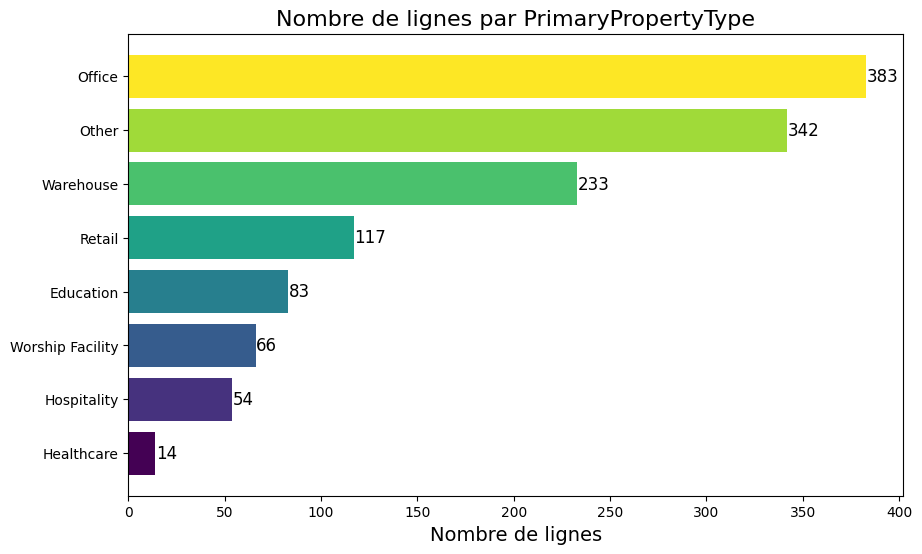

In [774]:
visualisation(df_building_clean[variables_explicatives_cat])

## 6. Feature Engineering

**Variables cibles :**

SiteEnergyUse(kBtu) -> pour la consommation d'énergie totale  
TotalGHGEmissions -> pour les émissions de gaz à effet de serre.

**Variables explicatives :**
Variables explicatives

PrimaryPropertyType : type principal du bâtiment.

Latitude / Longitude : localisation géographique.

YearBuilt : année de construction.

NumberofBuildings : nombre de bâtiments sur le site.

NumberofFloors : nombre d’étages.

PropertyGFABuilding(s) : surface totale des bâtiments.

New feature : pct_electricity / pct_gas / pct_steam : proportions des différents types d’énergie dans la consommation totale.

### 6.1 mix energetique : pct_electricity, pct_steam, pct_gaz

On transforme les consommations par type d’énergie en pourcentage du total pour représenter le mix énergétique sans révéler la consommation totale.

In [775]:
df_building_clean['pct_electricity'] = df_building_clean['Electricity(kBtu)'] / df_building_clean['SiteEnergyUse(kBtu)']
df_building_clean['pct_gas'] = df_building_clean['NaturalGas(kBtu)'] / df_building_clean['SiteEnergyUse(kBtu)']
df_building_clean['pct_steam'] = df_building_clean['SteamUse(kBtu)'] / df_building_clean['SiteEnergyUse(kBtu)']

In [776]:
df_building_clean = df_building_clean.drop(['Electricity(kBtu)', 'NaturalGas(kBtu)', 'SteamUse(kBtu)'], axis=1)

In [777]:
df_building_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1292 entries, 0 to 3375
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PrimaryPropertyType     1292 non-null   object 
 1   Latitude                1292 non-null   float64
 2   Longitude               1292 non-null   float64
 3   YearBuilt               1292 non-null   int64  
 4   NumberofBuildings       1292 non-null   float64
 5   NumberofFloors          1292 non-null   int64  
 6   PropertyGFAParking      1292 non-null   int64  
 7   PropertyGFABuilding(s)  1292 non-null   int64  
 8   SiteEnergyUse(kBtu)     1292 non-null   float64
 9   TotalGHGEmissions       1292 non-null   float64
 10  pct_electricity         1292 non-null   float64
 11  pct_gas                 1292 non-null   float64
 12  pct_steam               1292 non-null   float64
dtypes: float64(8), int64(4), object(1)
memory usage: 141.3+ KB


In [778]:
### 6.2 has_parking 

In [779]:
df_building_clean['has_parking'] = df_building_clean['PropertyGFAParking'] > 1

In [780]:
df_building_clean['has_parking'].value_counts()

has_parking
False    1075
True      217
Name: count, dtype: int64

In [781]:
### 6.3 Surface moyenne par bâtiment 

In [782]:
df_building_clean['NumberofBuildings'].value_counts()

NumberofBuildings
1.0    1226
0.0      43
2.0      13
3.0       8
4.0       2
Name: count, dtype: int64

In [783]:
df_building_clean['GFA_mean'] = df_building_clean['PropertyGFABuilding(s)'] / df_building_clean['NumberofBuildings'].replace(0, 1)

In [784]:
df_building_clean['GFA_mean'].describe()

count      1292.000000
mean      53909.138158
std       41817.627939
min        7125.000000
25%       26068.750000
50%       38979.500000
75%       63935.500000
max      302812.000000
Name: GFA_mean, dtype: float64

### 6.4 Unique building

In [785]:
df_building_clean['is_more_than_one_buildings'] = df_building_clean['NumberofBuildings'] > 1

In [786]:
df_building_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1292 entries, 0 to 3375
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   PrimaryPropertyType         1292 non-null   object 
 1   Latitude                    1292 non-null   float64
 2   Longitude                   1292 non-null   float64
 3   YearBuilt                   1292 non-null   int64  
 4   NumberofBuildings           1292 non-null   float64
 5   NumberofFloors              1292 non-null   int64  
 6   PropertyGFAParking          1292 non-null   int64  
 7   PropertyGFABuilding(s)      1292 non-null   int64  
 8   SiteEnergyUse(kBtu)         1292 non-null   float64
 9   TotalGHGEmissions           1292 non-null   float64
 10  pct_electricity             1292 non-null   float64
 11  pct_gas                     1292 non-null   float64
 12  pct_steam                   1292 non-null   float64
 13  has_parking                 1292 non-n

## 7. Détection des features redondantes

In [787]:
variables_explicatives_num = df_building_clean.select_dtypes(include=['int64', 'float64','bool']).drop(columns=['SiteEnergyUse(kBtu)', 'TotalGHGEmissions']).columns.tolist()
variables_explicatives_num 

['Latitude',
 'Longitude',
 'YearBuilt',
 'NumberofBuildings',
 'NumberofFloors',
 'PropertyGFAParking',
 'PropertyGFABuilding(s)',
 'pct_electricity',
 'pct_gas',
 'pct_steam',
 'has_parking',
 'GFA_mean',
 'is_more_than_one_buildings']

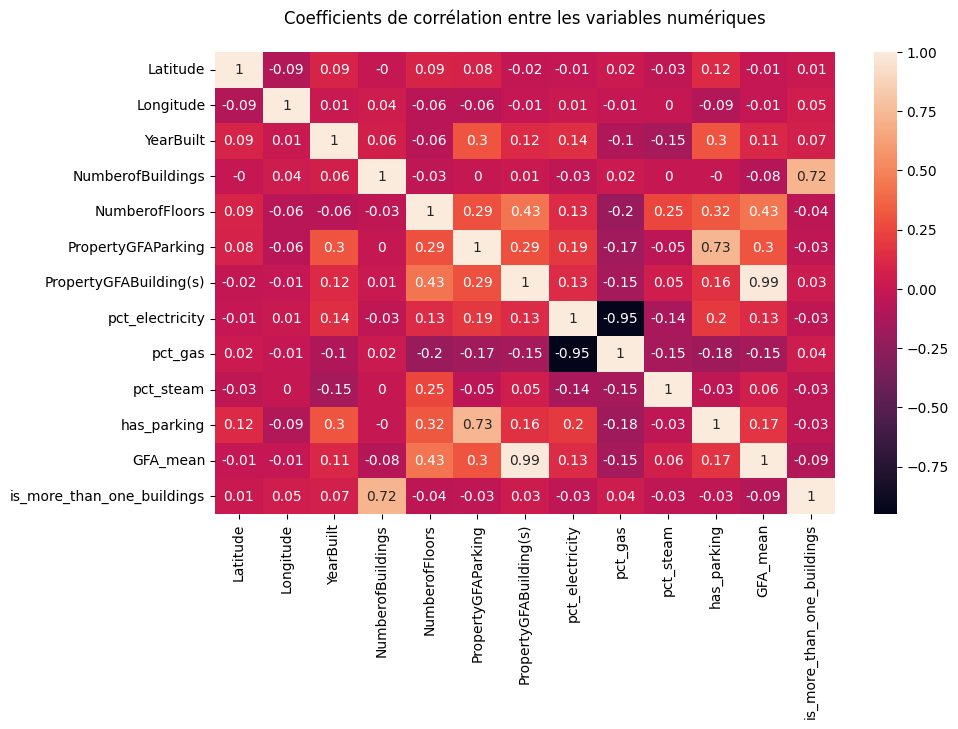

In [788]:
plt.figure(figsize=(10,6))
sns.heatmap(df_building_clean[variables_explicatives_num].corr().round(2), annot = True)
plt.title("Coefficients de corrélation entre les variables numériques", pad = 20)
plt.show()

Il y a une **corrélation positive** de 0,72 entre NumberofBuildings et is_more_than_one_buildings.

Pour simplifier le jeu de données : on conserve is_more_than_one_buildings.

On observe également une **corrélation négative** entre la pct_electricity et pct_gas : Ce phénomène est logique : les parts représentent des proportions d’une consommation totale, donc si l’une augmente, l’autre doit diminuer.

Il est suffisant de garder une seule pour le modèle (par exemple pct_electricity) et de supprimer l’autre pour éviter la multicolinéarité.

In [789]:
df_building_clean = df_building_clean.drop(columns=['NumberofBuildings', 'pct_gas','GFA_mean','is_more_than_one_buildings'])

In [790]:
df_building_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1292 entries, 0 to 3375
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PrimaryPropertyType     1292 non-null   object 
 1   Latitude                1292 non-null   float64
 2   Longitude               1292 non-null   float64
 3   YearBuilt               1292 non-null   int64  
 4   NumberofFloors          1292 non-null   int64  
 5   PropertyGFAParking      1292 non-null   int64  
 6   PropertyGFABuilding(s)  1292 non-null   int64  
 7   SiteEnergyUse(kBtu)     1292 non-null   float64
 8   TotalGHGEmissions       1292 non-null   float64
 9   pct_electricity         1292 non-null   float64
 10  pct_steam               1292 non-null   float64
 11  has_parking             1292 non-null   bool   
dtypes: bool(1), float64(6), int64(4), object(1)
memory usage: 122.4+ KB


In [791]:
variables_explicatives_num = df_building_clean.select_dtypes(include=['int64', 'float64','bool']).drop(columns=['SiteEnergyUse(kBtu)', 'TotalGHGEmissions']).columns.tolist()
variables_explicatives_num 

['Latitude',
 'Longitude',
 'YearBuilt',
 'NumberofFloors',
 'PropertyGFAParking',
 'PropertyGFABuilding(s)',
 'pct_electricity',
 'pct_steam',
 'has_parking']

## 8. Relations features et cible

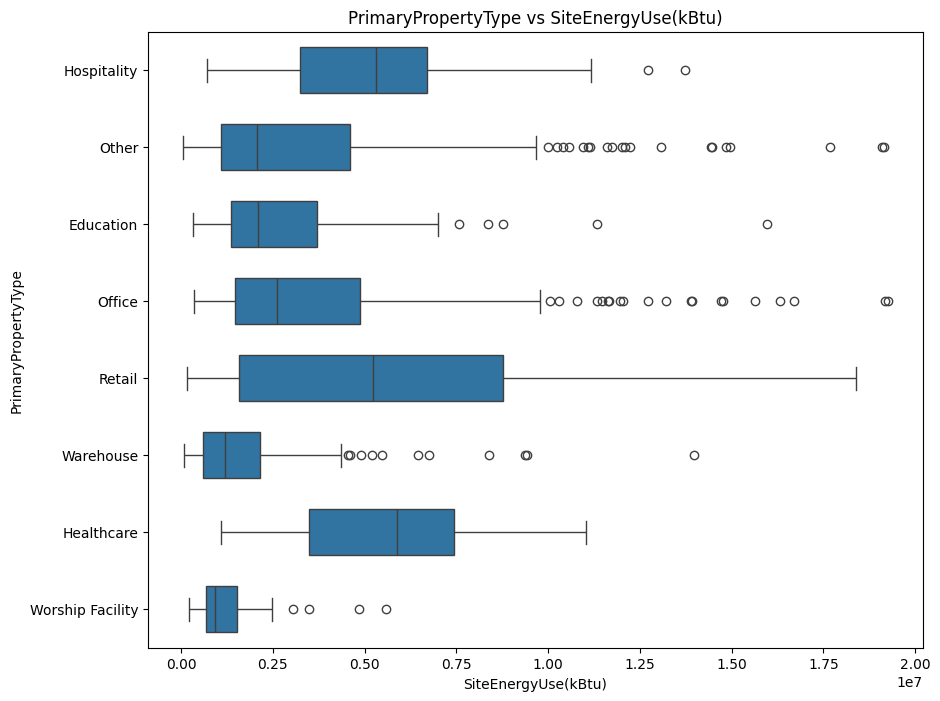

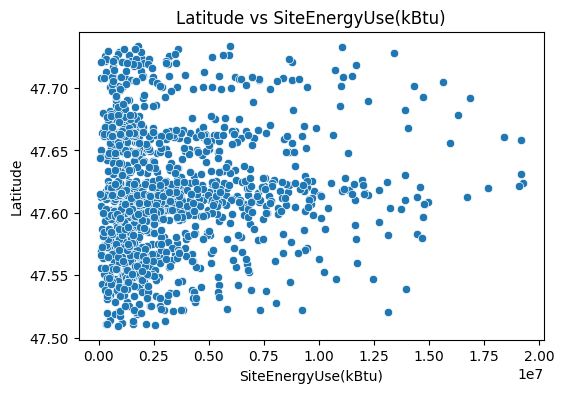

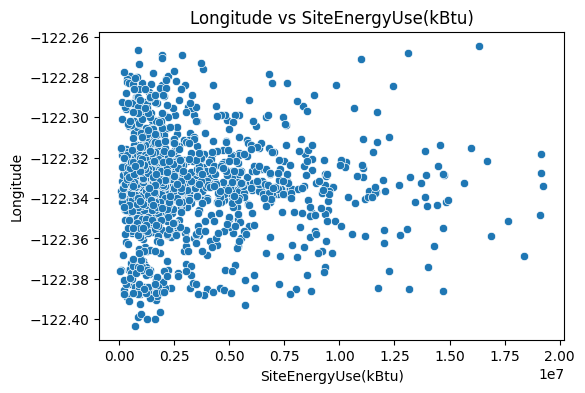

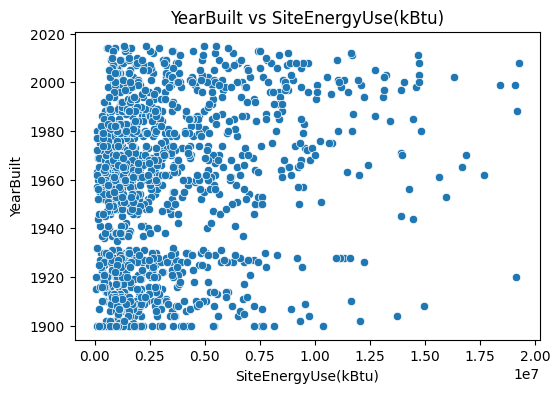

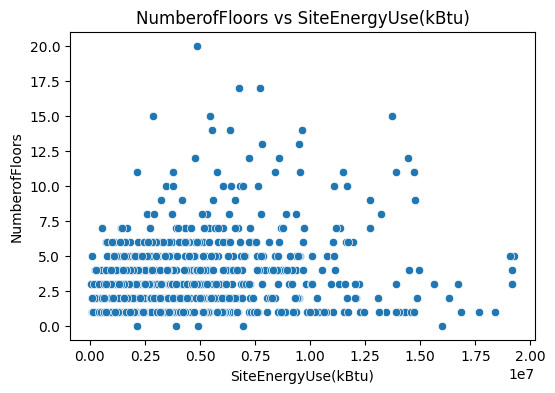

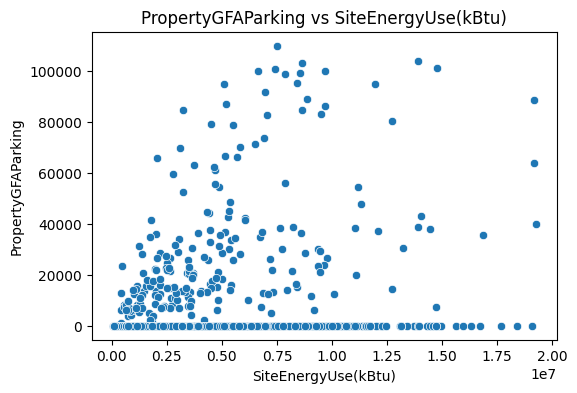

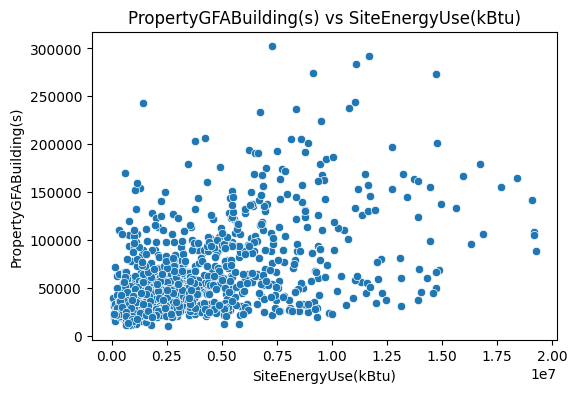

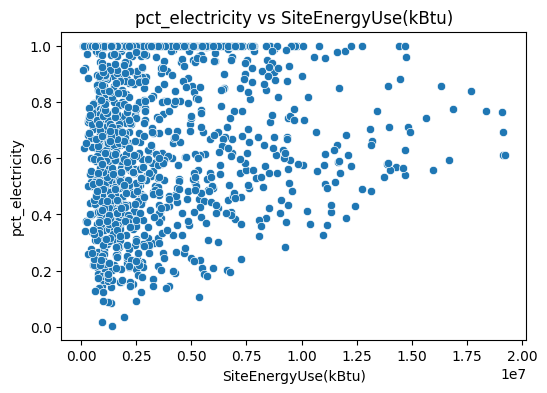

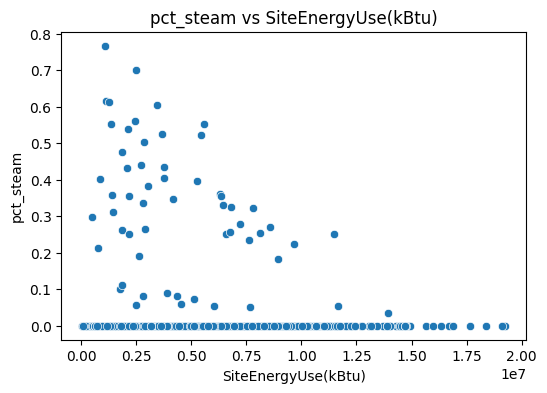

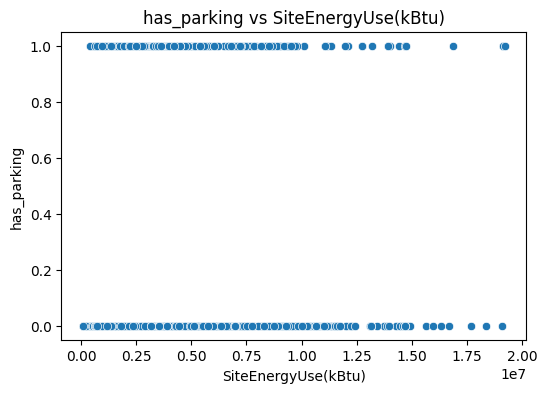

In [792]:
# features sont catégorielles

for col in variables_explicatives_cat:
    plt.figure(figsize=(10,8))
    sns.boxplot(x=df_building_clean['SiteEnergyUse(kBtu)'],y=df_building_clean[col],  dodge = True, width=0.6)
    plt.title(f'{col} vs SiteEnergyUse(kBtu)')
    plt.show()
    
# # Pour chaque variable numérique vs target
for col in variables_explicatives_num:
    plt.figure(figsize=(6,4))
    sns.scatterplot(x=df_building_clean['SiteEnergyUse(kBtu)'], y=df_building_clean[col])
    plt.title(f'{col} vs SiteEnergyUse(kBtu)')
    plt.show()

# Sélection automatique des colonnes numériques
numerical_cols = df_building_clean.select_dtypes(include=['int64', 'float64']).columns

# # Pairplot simple
# sns.pairplot(
#     df_building_clean,
#     vars=numerical_cols,# les colonnes numériques
#     hue='PrimaryPropertyType',   # variable catégorielle pour colorer
#     diag_kind='kde',             
#     kind='scatter'
# )
# plt.show()

La variable la plus corrélée  avec la consommation énergétique semble etre la surface du bâtiment.
Le type d'usage le plus consommateur est l'hospitality,le healthcare et le retail.

## 9. conclusion

In [793]:
print ("Suite au nettoyage, la taille du jeu de données est de", df_building_clean.shape[0], "lignes et", df_building_clean.shape[1], "colonnes.")
print ("A l'origine, la taille du jeu de données etait de", df_building_raw.shape[0], "lignes et", df_building_raw.shape[1], "colonnes.")

Suite au nettoyage, la taille du jeu de données est de 1292 lignes et 12 colonnes.
A l'origine, la taille du jeu de données etait de 3376 lignes et 46 colonnes.


In [794]:
df_building_clean.to_csv('data/building_clean.csv', index=False)